<a href="https://colab.research.google.com/github/MohammedMoyeezKagad/Airbnb-Booking-Analysis/blob/main/Moyeez_Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**
This project aims to analyze a dataset of Netflix movies and TV shows to understand trends, patterns, and relationships within the content available on the platform. We will explore the data using Exploratory Data Analysis (EDA), focusing on univariate, bivariate, and multivariate analysis techniques. The primary goal is to cluster similar movies and TV shows based on relevant features.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset contains information on TV shows and movies available on Netflix as of 2019, sourced from Flixable, a third-party Netflix search engine.

According to an intriguing report released by Flixable in 2018, the number of TV shows on Netflix has nearly tripled since 2010. In contrast, the number of movies on the platform has decreased by over 2,000 titles during the same period. This shift in content offerings presents a unique opportunity to explore further insights from the dataset.

Additionally, integrating this data with external sources like IMDb ratings or Rotten Tomatoes scores could lead to even more fascinating findings.

# ***Let's Begin !***

In [ ]:
!pip install pyLDAvis
!pip install contractions

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import libraries.
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import math
import time
from wordcloud import WordCloud
import re
import string

from scipy.stats import norm
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as sch
#importing kmeans
from sklearn.cluster import KMeans



#principal component analysis
from sklearn.decomposition import PCA


#silhouette score

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import davies_bouldin_score


#importing stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
#for tokenization
from nltk.tokenize import word_tokenize

#import stemmer
from nltk.stem.snowball import SnowballStemmer

#import tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

#LDA

import pyLDAvis
from sklearn.decomposition import LatentDirichletAllocation

#importing contraction

import contractions

from sklearn.cluster import AgglomerativeClustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification




import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Dataset Loading

In [ ]:
# Load Dataset
netflix_data = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
netflix_data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
netflix_data.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(netflix_data[netflix_data.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
netflix_data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


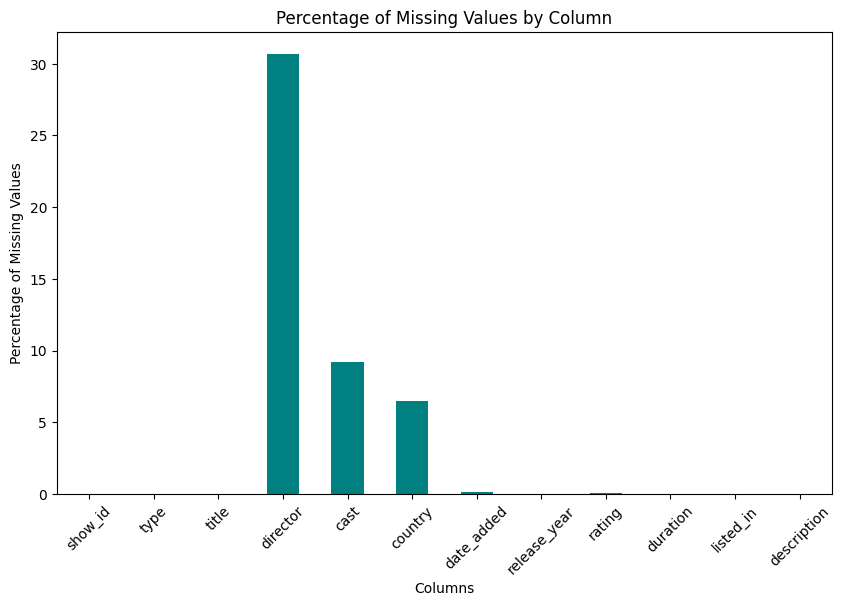

In [ ]:
# Visualizing the missing values
missing_percentage = netflix_data.isnull().sum() / len(netflix_data) * 100

# Create a bar plot to visualize the missing values
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='teal')

plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45)
plt.show()

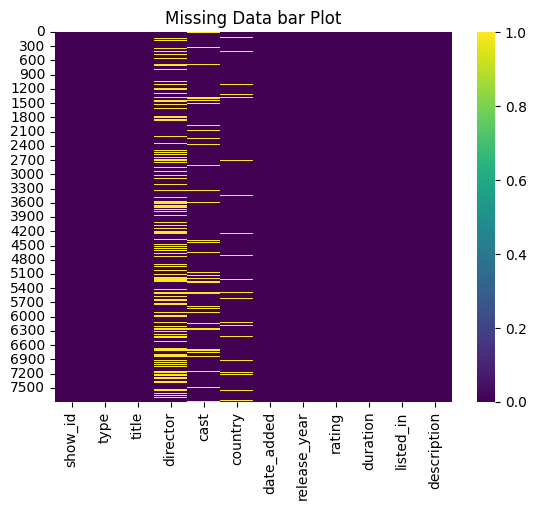

In [ ]:
# Visualizing the missing values
import missingno as msno


sns.heatmap(netflix_data.isna(),cmap="viridis")

plt.title('Missing Data bar Plot')
plt.show()

### What did you know about your dataset?

The dataset contains information on Tv shows and movies available on netflix as of 2021. It consists of 7787 rows and 12 columns. I observed that there are no duplicate values,but there are misssing values/null values in the dataset.There are 3631 null values in the dataset, 2389 null values in director column, 718 null values in cast column ,507 null values in country column ,10 in date_added and 7 in rating. So we need to handle null values. Except release year all variables are objects(string), release year is of int data type.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
netflix_data.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [ ]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Variables Description

Show Id : Unique Id for every movie/ Tv show

Type    : Identifier(Movie/Tv show)

Title   : Title of the movie or Tv show

Director: Director name

Cast    : Actors involved

Country : country of production

Date added: date a movie/show was added on the netflix

release_year: actual release year of show/movie

rating   :Tv rating of the show

duration : total duration in minutes or number of seasons

listed_in : type of genre

description: summary of the show/movie



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for i in netflix_data.columns.tolist():
  print('unique values in ',i, 'are', netflix_data[i].nunique())


unique values in  show_id are 7787
unique values in  type are 2
unique values in  title are 7787
unique values in  director are 4049
unique values in  cast are 6831
unique values in  country are 681
unique values in  date_added are 1565
unique values in  release_year are 73
unique values in  rating are 14
unique values in  duration are 216
unique values in  listed_in are 492
unique values in  description are 7769


In [ ]:
# Check Unique Values for each variable.
netflix_data['type'].unique()


array(['TV Show', 'Movie'], dtype=object)

In [ ]:
netflix_data['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
netflix_data_copy=netflix_data.copy()

In [ ]:
#lets handle null values before EDA.

#Replacing missing values in 'director' column with value 'unknown'

netflix_data_copy['director'].fillna('unknown', inplace=True)


#Replacing missing values in 'cast' column with value 'unknown'
netflix_data_copy['cast'].fillna('unknown', inplace=True)


#Replacing missing values in 'country' column with mode
netflix_data_copy['country'].fillna('Unavailable', inplace=True)


#Replacing missing values in 'rating' column with value most frequent rating i.e. mode
netflix_data_copy['rating'] = netflix_data_copy['rating'].fillna(netflix_data_copy['rating'].mode()[0])

# Dropping the null values in 'date_added'
netflix_data_copy = netflix_data_copy[netflix_data_copy['date_added'].notna()]

In [ ]:
netflix_data_copy['type'] = pd.Categorical(netflix_data_copy['type'])

In [ ]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix_data_copy['censor'] = netflix_data_copy['rating'].replace(ratings)

In [ ]:
netflix_data_copy['censor'] = pd.Categorical(netflix_data_copy['censor'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [ ]:
netflix_data_copy.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,censor
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults


In [ ]:
netflix_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7777 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       7777 non-null   object  
 1   type          7777 non-null   category
 2   title         7777 non-null   object  
 3   director      7777 non-null   object  
 4   cast          7777 non-null   object  
 5   country       7777 non-null   object  
 6   date_added    7777 non-null   object  
 7   release_year  7777 non-null   int64   
 8   rating        7777 non-null   object  
 9   duration      7777 non-null   object  
 10  listed_in     7777 non-null   object  
 11  description   7777 non-null   object  
 12  censor        7777 non-null   category
dtypes: category(2), int64(1), object(10)
memory usage: 744.6+ KB


### What all manipulations have you done and insights you found?

I have copied my dataset into netflix_data_copy and handled null values on this dataset.

I have kept unknown for missing values in Director and cast columns. unavailable for country column, mode for rating column and dropped the null values in date_added column. I created a new column censor from rating.

Lets do data visualization on netflix_data_copy dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: xlabel='type', ylabel='count'>

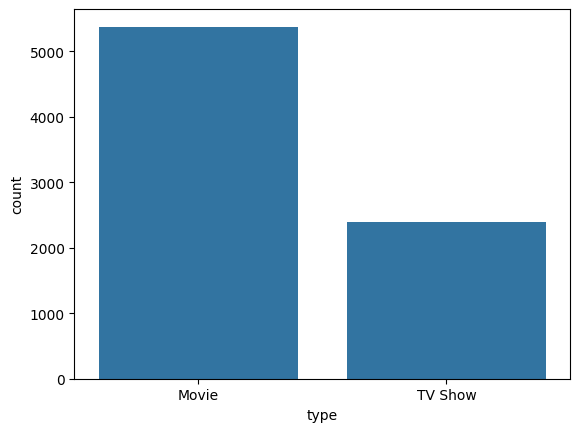

In [ ]:
# Chart - 1 visualization code
#countplot to visualize the number of movies and tv_shows in type column
sns.countplot(x = 'type', data =  netflix_data_copy)

##### 1. Why did you pick the specific chart?

countplot gives the count of each type in a feature. Here we have Movies and Tv shows

##### 2. What is/are the insight(s) found from the chart?

It is evident that movies are more on netflix than Tv shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix can assess the popularity and demand for each type of content. This knowledge can inform content acquisition decisions, production strategies, and recommendations, leading to a better understanding of user preferences and potentially improving user engagement.

#### Chart - 2 - Ratings

In [ ]:
# Chart - 2 visualization code
#storing tv shows and movies separately

tv_shows=netflix_data_copy[netflix_data_copy['type']=='TV Show']
movies=netflix_data_copy[netflix_data_copy['type']=='Movie']

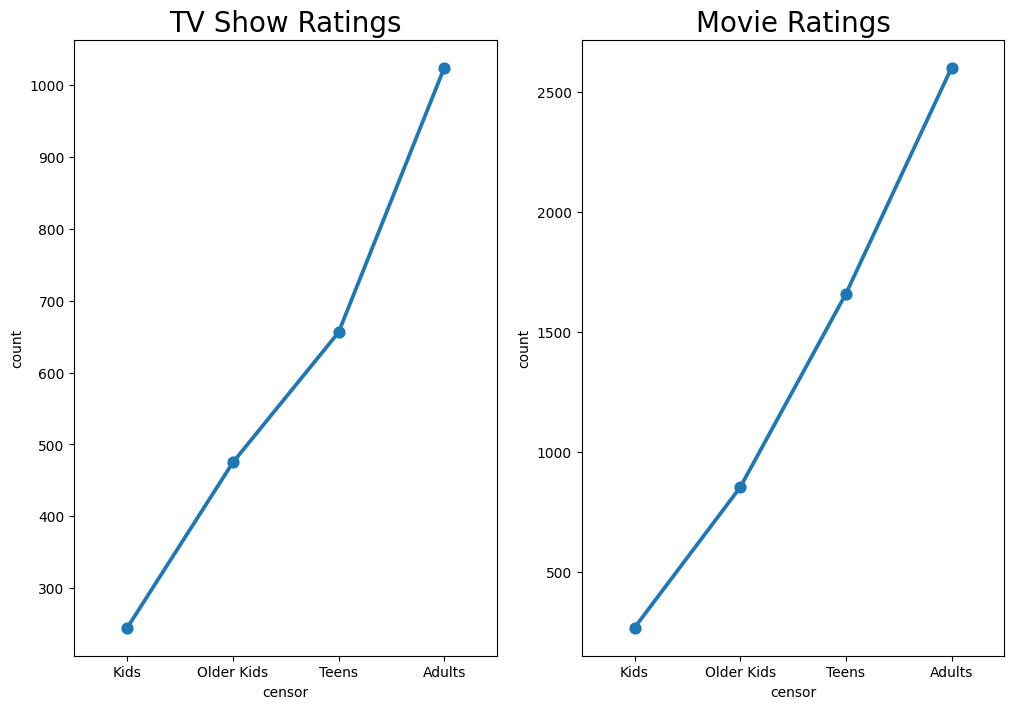

In [ ]:
tv_ratings = tv_shows.groupby(['censor'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
tv_movies_r=movies.groupby(['censor'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(12, 8))

sns.pointplot(x='censor', y='count', data=tv_ratings, ax=axes[0])
sns.pointplot(x='censor', y='count', data=tv_movies_r, ax=axes[1])

axes[0].set_title('TV Show Ratings', size=20)
axes[1].set_title('Movie Ratings', size=20)

plt.show()

##### 1. Why did you pick the specific chart?

I chose a point plot (specifically, sns.pointplot()) to visualize the ratings distribution of TV shows and movies. A point plot is suitable for showcasing categorical data (censor) and their corresponding counts.

##### 2. What is/are the insight(s) found from the chart?

It displays the count of TV shows and movies in each rating category(censor), indicating the popularity of different ratings. Here, Adult rating content is present most for the Tvshows and movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This information can inform content acquisition decisions, content creation strategies, and personalized recommendations based on user preferences. If more people are watching Adult tvshows, netflix can focus on producing more content on that.

#### Chart - 3

<Axes: title={'center': 'movie ratings'}, xlabel='rating', ylabel='count'>

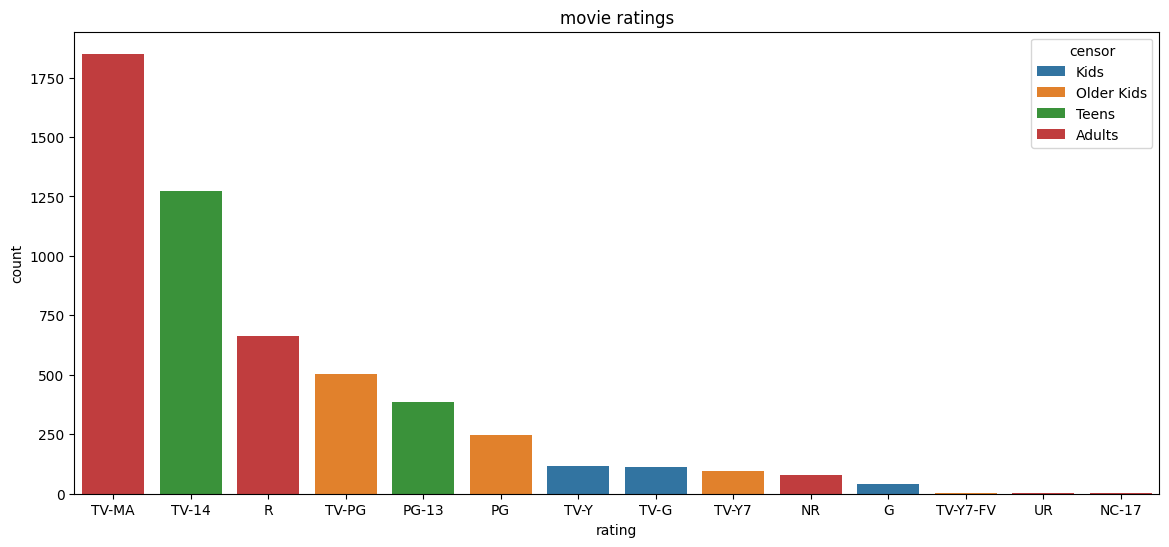

In [ ]:
# Chart - 3 visualization code
#Movie Ratings based on censor categories

plt.figure(figsize=(14,6))
plt.title('movie ratings')
sns.countplot(x=movies['rating'],hue=movies['censor'],data=movies,order=movies['rating'].value_counts().index)

##### 1. Why did you pick the specific chart?

countplot allows for easy comparison of the count of movie ratings, while the hue parameter adds an additional categorical variable (censor categories) to provide further insights.

##### 2. What is/are the insight(s) found from the chart?

Here also same TV-MA rating is high for movies, which means more adult movies are on netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By analyzing movie ratings based on censor categories, Netflix can gain an understanding of the distribution of ratings for different censor categories.This information can inform content acquisition decisions, content filtering options, and recommendations.

#### Chart - 4 - Release Year

In [ ]:
# Chart - 4 visualization code
no_movies_year =movies['release_year'].value_counts().sort_index(ascending=False)
no_tvshows_year =tv_shows['release_year'].value_counts().sort_index(ascending=False)

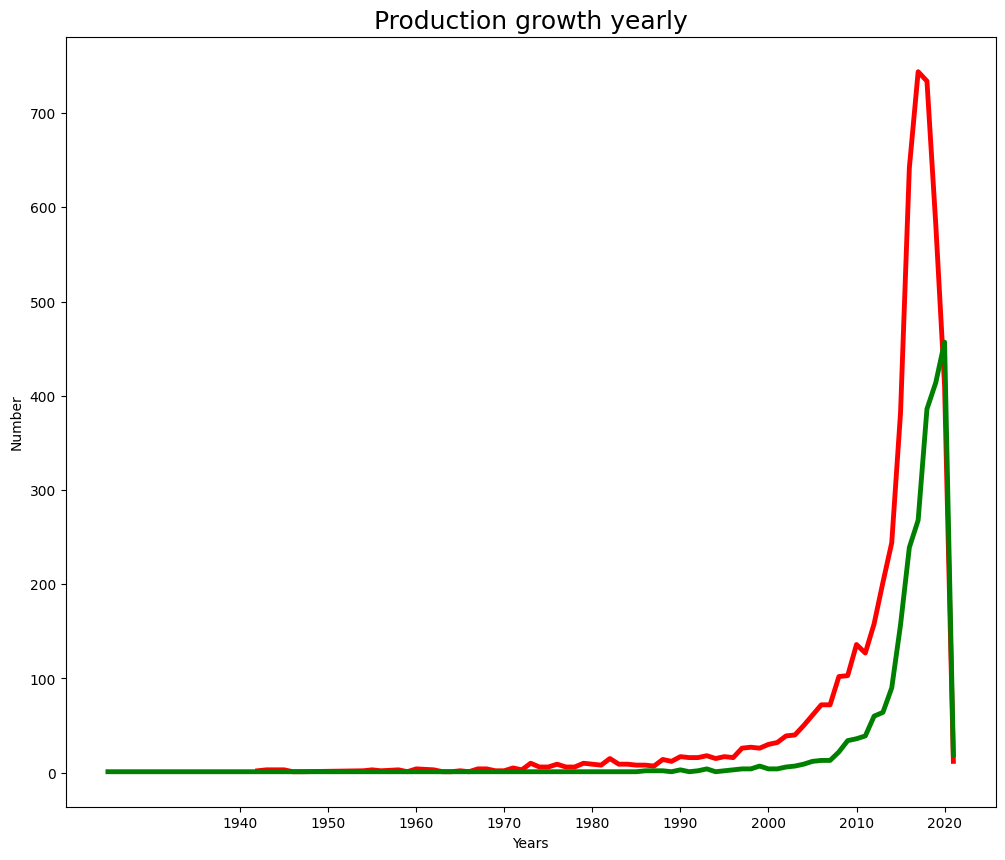

In [ ]:
#comparing release of movies and tv_shows yearly

no_movies_year.plot(figsize=(12, 10), linewidth=3.5, color='red',label="Movies / year")
no_tvshows_year.plot(figsize=(12, 10), linewidth=3.5, color='green',label="TV Shows / year")
plt.xlabel("Years")
plt.ylabel("Number")
plt.title("Production growth yearly", fontsize=18);
years = [1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]  # Add the specific years you want to display
plt.xticks(years);

##### 1. Why did you pick the specific chart?

I chose a line plot to visualize the yearly production growth of movies and TV shows. A line plot is suitable for showcasing trends and changes over time.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that after 2000, production of movies and tv_shows has increases rapidly. After 2017 or 2018 production seem to dropped significantly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By analyzing the yearly production growth of movies and TV shows, Netflix can identify patterns and trends in content creation.

#### Chart - 5

<Axes: xlabel='count', ylabel='release_year'>

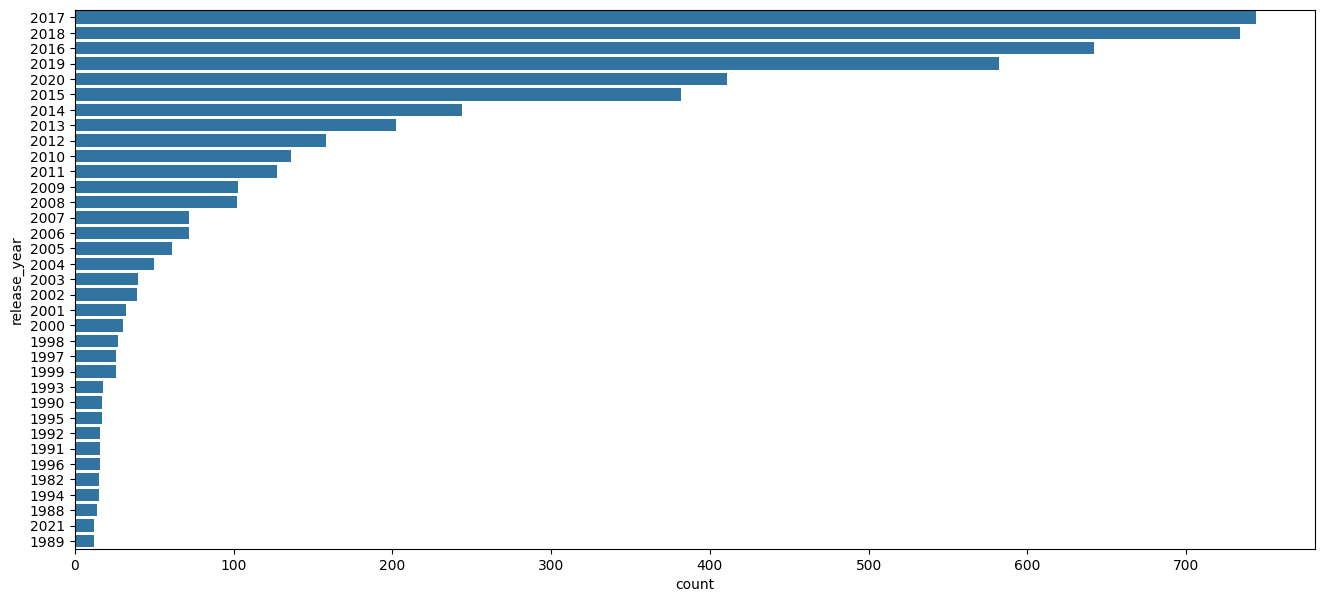

In [ ]:
# Chart - 5 visualization code
#Movies released per year in the last two decades.

plt.figure(figsize=(16,7))
sns.countplot(y=movies['release_year'],data=netflix_data_copy,order=movies['release_year'].value_counts().index[0:35])

<Axes: xlabel='count', ylabel='release_year'>

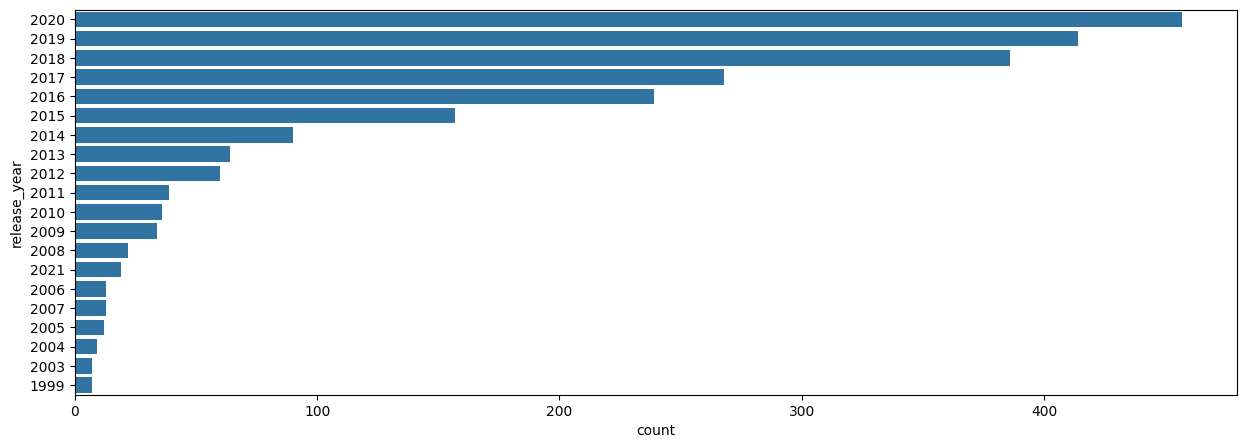

In [ ]:
#Analysing how many movies released per year in last 15 years
plt.figure(figsize=(15,5))
sns.countplot(y=tv_shows['release_year'],data=netflix_data_copy,order=tv_shows['release_year'].value_counts().index[0:20])

##### 1. Why did you pick the specific chart?

I chose a horizontal bar plot (countplot) to visualize the count of Movies and TV shows released each year. A horizontal bar plot is suitable for displaying the distribution of a categorical variable (release year) and allows for easy comparison.

##### 2. What is/are the insight(s) found from the chart?

In Movies, most of the movies produced in 2017 and 2018. In Tv_shows, most of the shows produced in 2020 and 2019.

An observation here is, number of movies from 2017 being produced are low. The production rate of movies has been decreasing from 2017. while production rate of Tv_shows has been increasing from 2016. Even though number of movies are high, the production rate is decreasing in turn by 2021, tv shows(19) are more produced than movies(12).

This tells us that, from 2016, netflix has been focusing more on Tv_shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insight can help create a positive business impact. By analyzing the count of TV show releases each year, Netflix can identify trends, patterns, and popular years for TV show production. This is the reason we are seeing netflix has been focusing on increasing tv_shows from 2016.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
# Top 10 countries
#Creating a new feature 'main_Country'
top10_country= netflix_data_copy['country'].apply(lambda x: x.split(",")[0])

Text(0.5, 1.0, 'Top 10 Countries with Most Content')

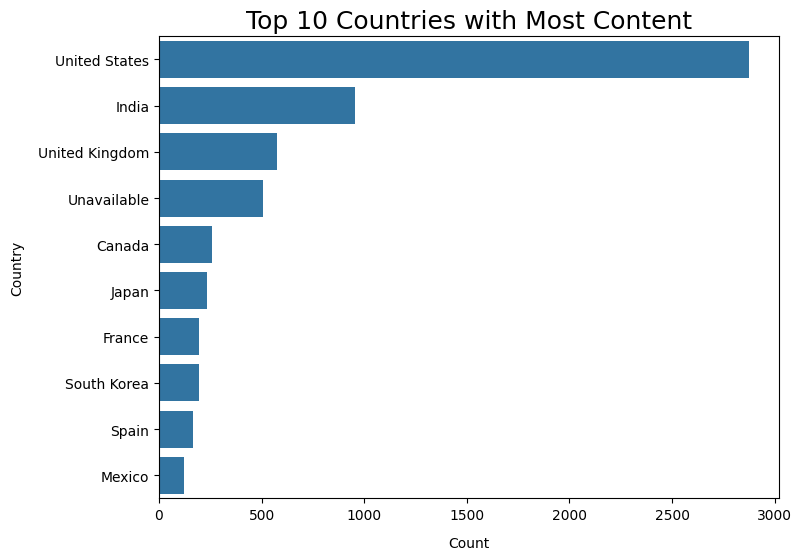

In [ ]:
#top_10 content producing countries on Netflix
plt.figure(figsize=(8,6))

sns.countplot(y=top10_country, data=netflix_data_copy, order=top10_country.value_counts().index[:10])

plt.xlabel("Count", labelpad=10)
plt.ylabel("Country", labelpad=10)
plt.title("Top 10 Countries with Most Content", fontsize=18)

##### 1. Why did you pick the specific chart?

I chose a countplot with the country variable on the y-axis because it allows for a clear visualization of the count of content from different countries.

##### 2. What is/are the insight(s) found from the chart?

It is evident from the data that USA is the largest producer of content on netflix followed by India and UK.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insight can help create a positive business impact. By analyzing the count of content from different countries, Netflix can identify the countries with the highest production and popularity of content. This information can guide content acquisition decisions, content localization strategies, and regional targeting.

#### Chart - 7

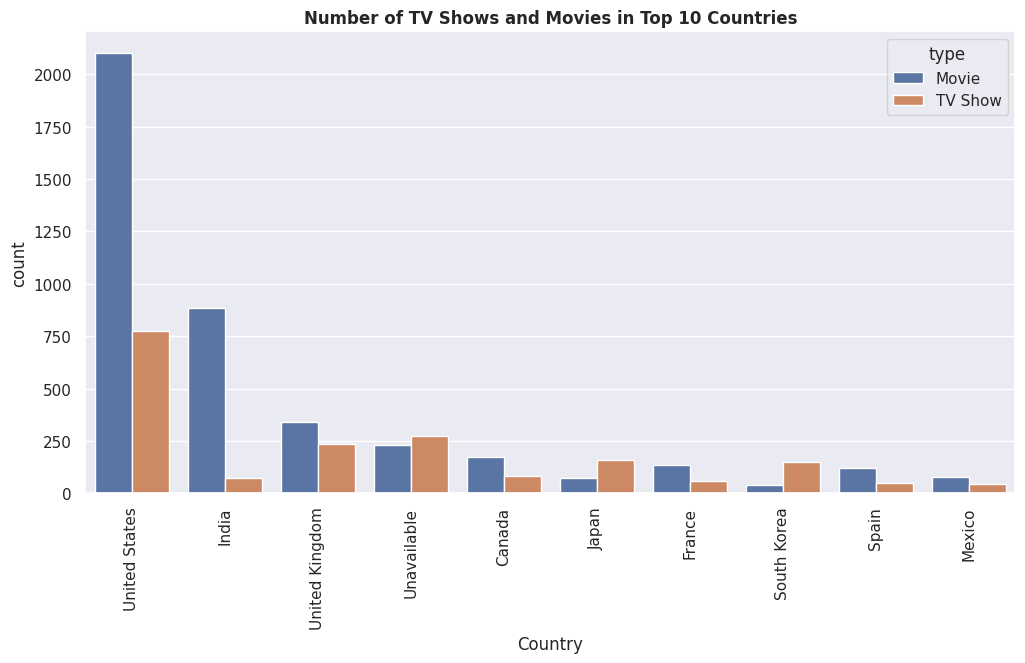

In [ ]:
# Chart - 7 visualization code
#Number of TV Shows and Movies in top 10 countries
sns.set()
plt.figure(figsize=(12, 6))
ax = sns.countplot(x=top10_country, data=netflix_data_copy, hue="type", order=top10_country.value_counts().index[:10])

plt.xticks(rotation=90)
plt.xlabel('Country')
plt.title("Number of TV Shows and Movies in Top 10 Countries", fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a countplot with the top 10 countries on the x-axis because it allows for a clear visualization of the count of TV shows and movies in each country. By using the hue parameter to differentiate between TV shows and movies, it provides a comprehensive view of the type of content in each country.

##### 2. What is/are the insight(s) found from the chart?

In most of the countries, Movies are being produced more on netflix than Tv_shows except south korea which produces more tv_shows than movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By analyzing the count of TV shows and movies in the top 10 countries, Netflix can understand the content preferences and popularity of different types of content in specific regions. It can help Netflix tailor its content offerings to specific markets.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
#top 10 directors
top10_directors=netflix_data_copy[netflix_data_copy['director']!='unknown']


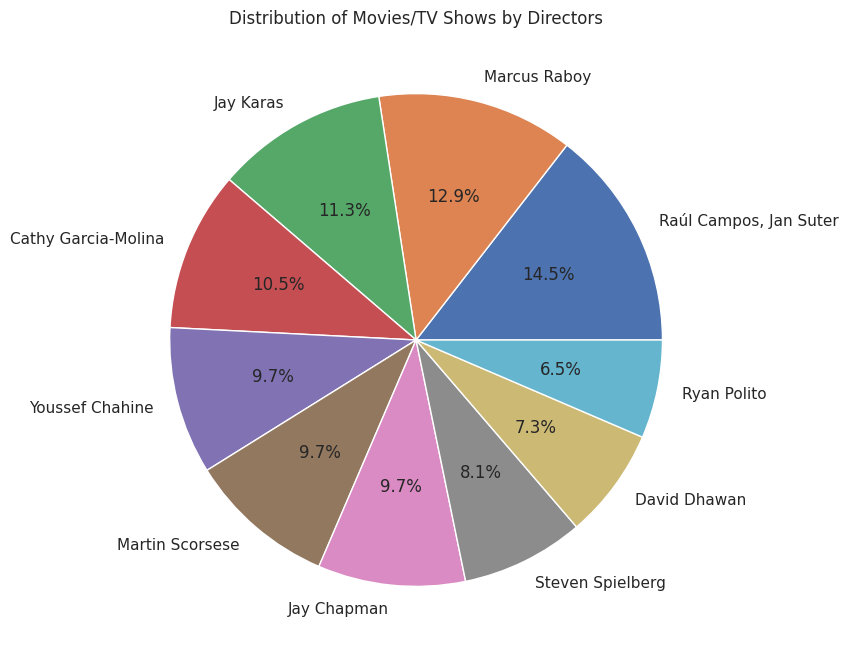

In [ ]:
#plotting top10 directors producing all types of content on netflix

director_counts = top10_directors['director'].value_counts().head(10)

plt.figure(figsize=(8, 8))
plt.pie(director_counts.values, labels=director_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Movies/TV Shows by Directors')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a pie chart to visualize the distribution of movies/TV shows among the top 10 directors. A pie chart allows for a clear representation of the proportions of each director's contribution to the total count of movies/TV shows.

##### 2. What is/are the insight(s) found from the chart?

Raul Campos and Jan Suter are the top directors who produced content on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By this,Netflix can identify the most influential directors in terms of content production. It can also contribute to enhancing the content library, attracting talented directors, and potentially creating high-quality and popular content that resonates with viewers.

#### Chart - 9

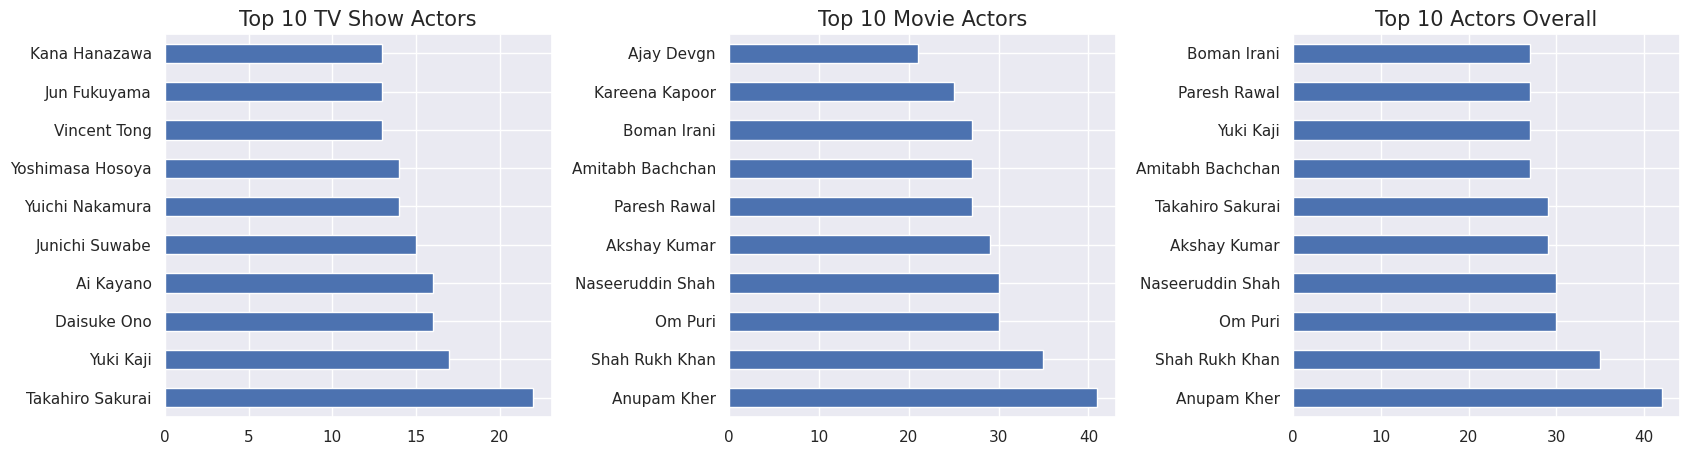

In [ ]:
# Chart - 9 visualization code
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Separating TV show actors from the cast column and excluding "unknown" values
top_TVshows_actor = netflix_data_copy[netflix_data_copy['type'] == 'TV Show']['cast'].str.split(', ', expand=True).stack()
top_TVshows_actor = top_TVshows_actor[top_TVshows_actor != 'unknown']

# Plotting actors who appeared in the highest number of TV shows
top10_TVshows_actor_plot = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0])
top10_TVshows_actor_plot.set_title('Top 10 TV Show Actors', size=15)

# Separating movie actors from the cast column and excluding "unknown" values
top_movie_actor = netflix_data_copy[netflix_data_copy['type'] == 'Movie']['cast'].str.split(', ', expand=True).stack()
top_movie_actor = top_movie_actor[top_movie_actor != 'unknown']

# Plotting actors who appeared in the highest number of movies
top10_movie_actor_plot = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1])
top10_movie_actor_plot.set_title('Top 10 Movie Actors', size=15)

# Combining TV show and movie actors and plotting overall top 10 actors
top_actors = pd.concat([top_TVshows_actor, top_movie_actor])
top10_actors_plot = top_actors.value_counts().head(10).plot(kind='barh', ax=ax[2])
top10_actors_plot.set_title('Top 10 Actors Overall', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar plot to visualize the top 10 actors in TV shows, movies, and overall because it provides a clear representation of the count of appearances by each actor

##### 2. What is/are the insight(s) found from the chart?

In Tv shows, Takahiro Sakurai is the top actor acted in more shows, in movies Anupam Kher is the top actor and overall Anupam Kher is the top actor acted in more movies and Tvshows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By analyzing the top actors in TV shows, movies, and overall, Netflix can gain insights into the actors who have a strong presence and following among viewers.It can help Netflix tailor its offerings to feature popular actors and attract a wider audience by delivering content that aligns with viewers' preferences.

#### Chart - 10 - Genre

In [ ]:
!pip install squarify

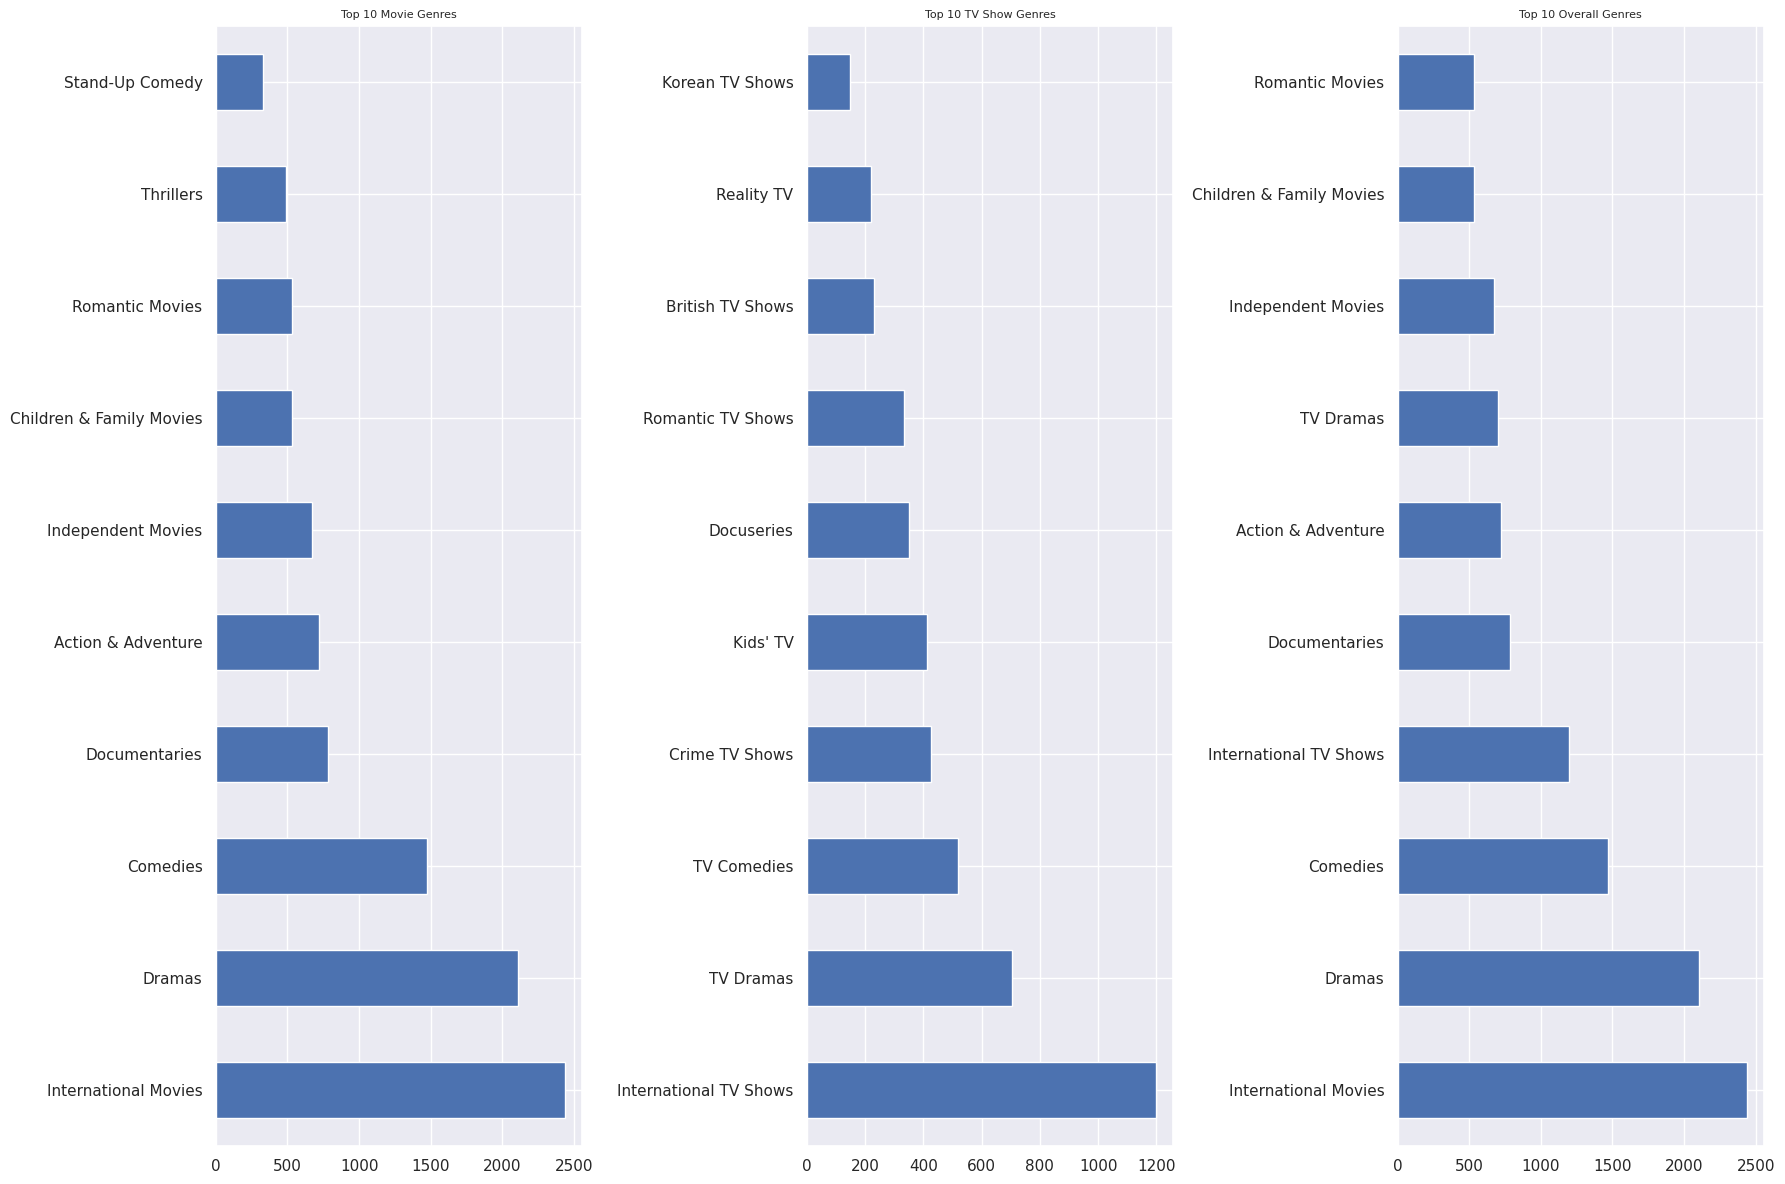

In [ ]:
# Chart - 10 visualization code

fig, ax = plt.subplots(1, 3, figsize=(18, 12))

# Top 10 Genres for Movies
top_movie_genres = netflix_data_copy[netflix_data_copy['type'] == 'Movie']['listed_in'].str.split(', ', expand=True).stack()
top10_movie_genres = top_movie_genres.value_counts().head(10)
top10_movie_genres_plot = top10_movie_genres.plot(kind='barh', ax=ax[0])
top10_movie_genres_plot.set_title('Top 10 Movie Genres', size=8)

# Top 10 Genres for TV Shows
top_tv_genres = netflix_data_copy[netflix_data_copy['type'] == 'TV Show']['listed_in'].str.split(', ', expand=True).stack()
top10_tv_genres = top_tv_genres.value_counts().head(10)
top10_tv_genres_plot = top10_tv_genres.plot(kind='barh', ax=ax[1])
top10_tv_genres_plot.set_title('Top 10 TV Show Genres', size=8)

# Top 10 Overall Genres
top_genres = netflix_data_copy['listed_in'].str.split(', ', expand=True).stack()
top10_genres = top_genres.value_counts().head(10)
top10_genres_plot = top10_genres.plot(kind='barh', ax=ax[2])
top10_genres_plot.set_title('Top 10 Overall Genres', size=8)

plt.tight_layout()
plt.show()

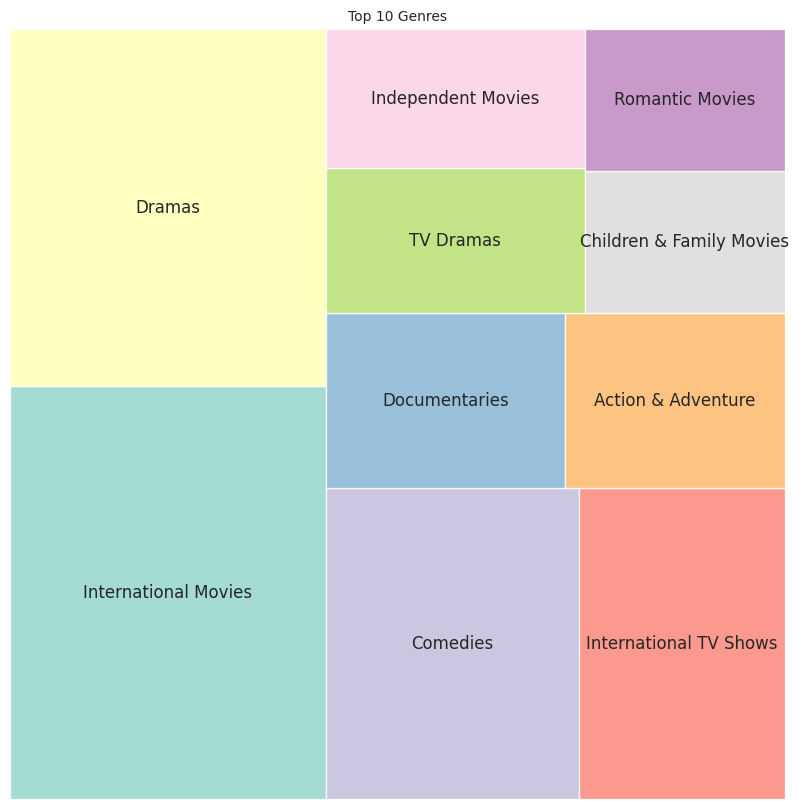

In [ ]:
import squarify

# Top 10 Genres
top_genres = netflix_data_copy['listed_in'].str.split(', ', expand=True).stack()
top10_genres = top_genres.value_counts().head(10)

# Calculate the relative sizes for the treemap
sizes = top10_genres.values
labels = top10_genres.index
color = plt.cm.Set3(range(len(labels)))

# Create the treemap
plt.figure(figsize=(10, 10))
squarify.plot(sizes=sizes, label=labels, color=color, alpha=0.8)

# Add labels and title
plt.title('Top 10 Genres', size=10)
plt.axis('off')

plt.show()

##### 1. Why did you pick the specific chart?

I chose barplot to visualize the top 10 genres movie wise, Tv_shows and overall. I also used treemap chart to visualize the top 10 genres because it effectively displays the relative proportions of different categories. The size of each rectangle in the treemap represents the frequency or count of each genre.

##### 2. What is/are the insight(s) found from the chart?

In both movies, Tv_shows and overall, International movies, tv_shows are the top genres followed by Drama and Comedy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It gives positive impact by understanding the most popular genres among the movies and TV shows on Netflix, businesses can make informed decisions regarding content acquisition, production, and marketing. It can help streaming platforms like Netflix in curating their content library, targeting specific audience preferences, and attracting more viewers.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

netflix_data_copy['month'] = pd.DatetimeIndex(netflix_data_copy['date_added']).month
netflix_data_copy.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,censor,month
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1


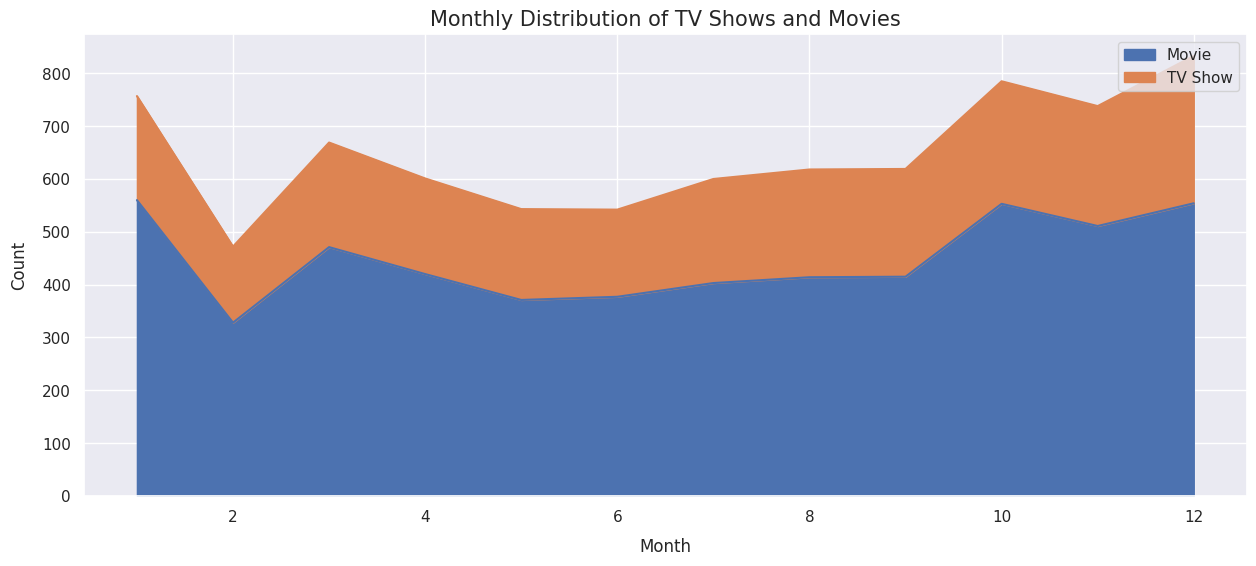

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

# Group the data by month and count the number of TV shows and movies
monthly_counts = netflix_data_copy.groupby(['month', 'type']).size().unstack()

# Plot a stacked area chart
monthly_counts.plot(kind='area', stacked=True, ax=ax)

# Customize the plot
ax.set_xlabel('Month', labelpad=10)
ax.set_ylabel('Count', labelpad=10)
ax.set_title('Monthly Distribution of TV Shows and Movies', fontsize=15)
ax.legend(loc='upper right')

plt.show()


##### 1. Why did you pick the specific chart?

I chose a stacked area chart to visualize the monthly distribution of TV shows and movies because it effectively shows the overall trend and the contribution of each type (TV shows and movies) over time.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that, more movies and tv_shows were released in the months of January, October, November and December which is a holiday season and makes sense that more people would engage netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It provides valuable information on the popularity and demand for TV shows and movies over time. If subcriber information present in the dataset, then with above graph netflix can decide when to release content and when not.

#### Chart - 12 - Duration

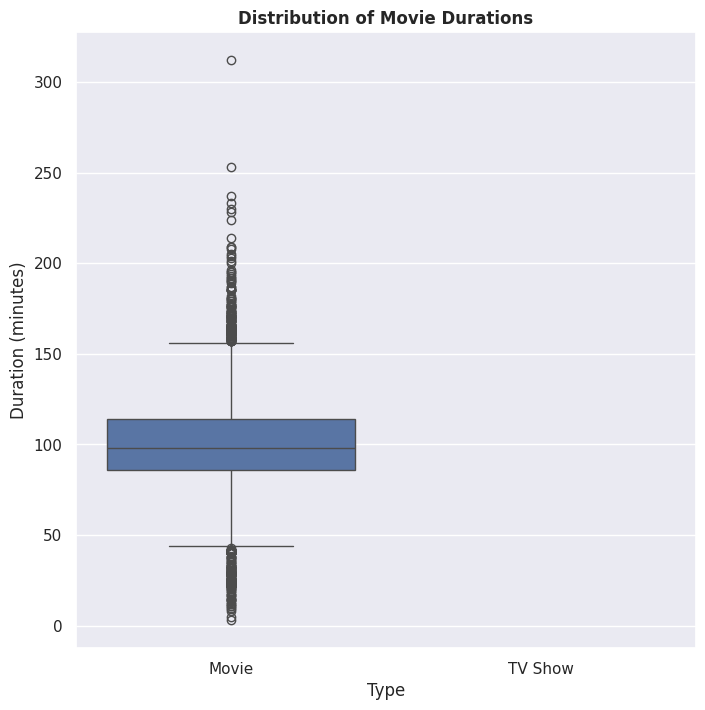

In [ ]:
# Chart - 12 visualization code
#Checking the distribution of Movie Duration
plt.figure(figsize=(8, 8))

# Extract the numeric values from the 'duration' column for movies
movies['duration_numeric'] = movies['duration'].str.extract('(\d+)', expand=False).astype(float)

# Plot a box plot of movie durations
sns.boxplot(x='type', y='duration_numeric', data=movies)

# Customize the plot
plt.title('Distribution of Movie Durations', fontweight='bold')
plt.xlabel('Type')
plt.ylabel('Duration (minutes)')
plt.show()

<Axes: title={'center': 'Distribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

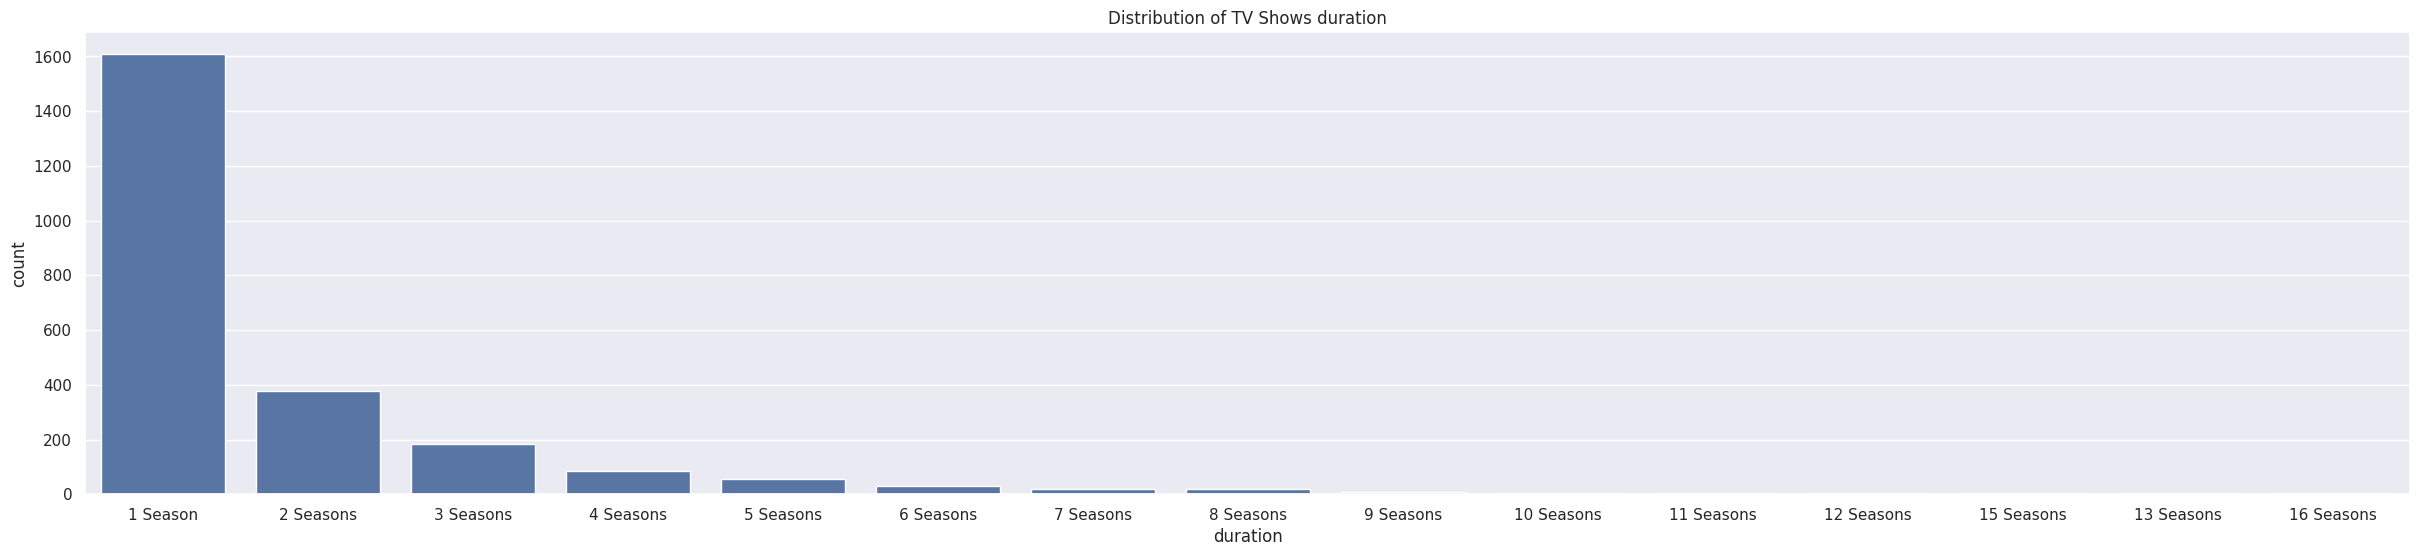

In [ ]:
plt.figure(figsize=(30,6))
plt.title("Distribution of TV Shows duration")
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)

##### 1. Why did you pick the specific chart?

I chose a box plot to visualize the distribution of movie durations because it gives us the range of movies lying in the inter quartile range.

I also used count plot to visualize tv_shows duration.

##### 2. What is/are the insight(s) found from the chart?

Most duration for many movies is 50 to 150 minutes and for tv_shows, many are single seasoned shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This cannot directely give positive business context but if given subscriber watching time or reviews, then we can plot a graph to see whether duration is playing any role in subscribers list and reviews. By using that, Netflix can produce movies or tv shows with audience desired duration.

#### Chart - 13

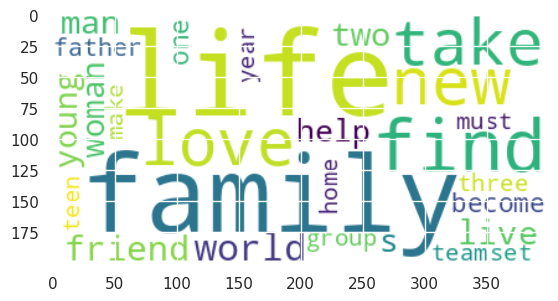

In [ ]:
from wordcloud import WordCloud, STOPWORDS
text = " ".join(word for word in netflix_data_copy['description'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

##### 1. Why did you pick the specific chart?

The word cloud chart was chosen to visually represent the most frequent words in the 'description' column.

##### 2. What is/are the insight(s) found from the chart?

The most frequent words are Love, life,family,find,new,world

#### Chart - 14 - Correlation Heatmap

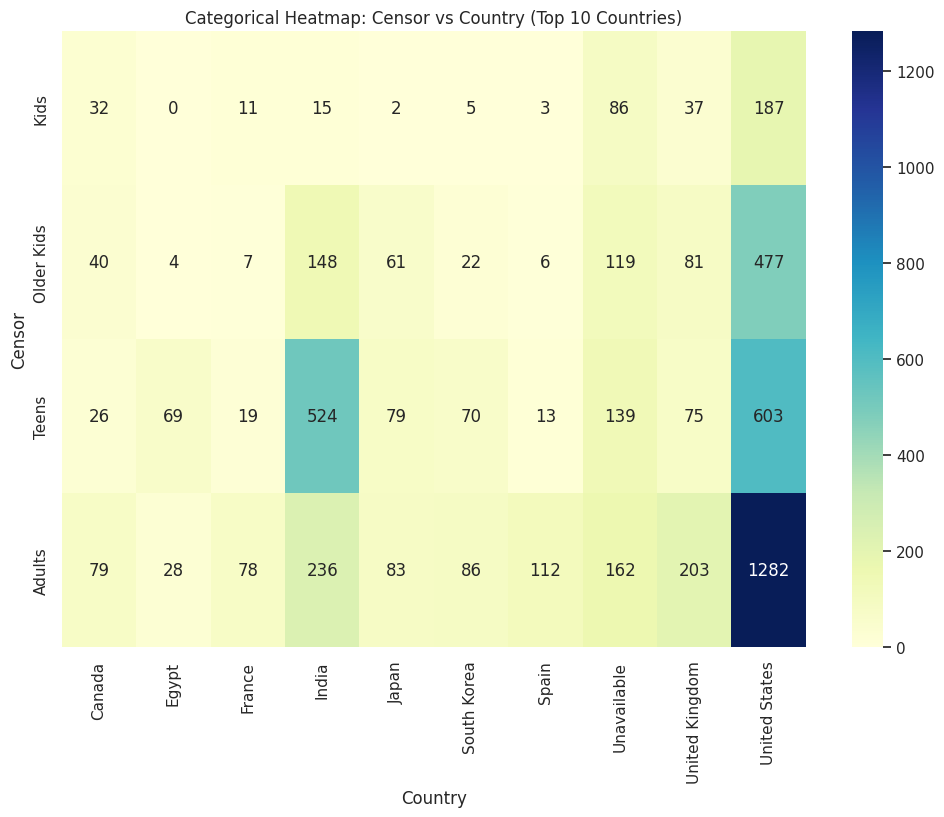

In [ ]:
# Correlation Heatmap visualization code

# Create a subset of the dataframe with the relevant columns
subset_df = netflix_data_copy[['censor', 'country']]

# Drop rows with missing values
subset_df.dropna(inplace=True)

# Get the top 10 countries by count
top_10_countries = subset_df['country'].value_counts().head(10).index

# Filter the data for the top 10 countries
subset_df = subset_df[subset_df['country'].isin(top_10_countries)]

# Pivot the data to get the frequency counts for each combination of variables
heatmap_data = subset_df.groupby(['censor', 'country']).size().unstack()

# Plot the frequency heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Categorical Heatmap: Censor vs Country (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Censor')
plt.show()

##### 1. Why did you pick the specific chart?

The frequency heatmap was chosen as it is suitable for visualizing the distribution and relationships between categorical variables, specifically the 'censor' and 'country' variables. It allows us to observe the frequency counts for each combination of these variables visually.

##### 2. What is/are the insight(s) found from the chart?

Adult content is more produced in US followed by UK. Whereas in India Teen content is produced more than Adult.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1.Hypothetical Statement:Netflix has been focusing on tv shows rather than movis in recent years from 2017 to 2021.

2.Hypothetical Statement: There is a significant difference in the distribution of release years between TV shows and movies.

3.Hypothetical Statement: The distribution of censor ratings is significantly different between movies and TV shows.


### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 (Null Hypothesis): The average release year of TV shows and movies in recent years (2017-2021) is the same. There is no significant difference in the release year between TV shows and movies.

H1 (Alternative Hypothesis): The average release year of TV shows and movies in recent years (2017-2021) is different. There is a significant difference in the release year between TV shows and movies, indicating a focus on either TV shows or movies during this period.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.weightstats import ztest

# Filter the data for TV shows and movies in the recent years (2017-2021)
tv_shows_recent = netflix_data_copy[(netflix_data_copy['type'] == 'TV Show') & (netflix_data_copy['release_year'].between(2017, 2021))]
movies_recent = netflix_data_copy[(netflix_data_copy['type'] == 'Movie') & (netflix_data_copy['release_year'].between(2017, 2021))]

# Perform the z-test
z_statistic, p_value = ztest(tv_shows_recent['release_year'], movies_recent['release_year'])

# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("We Reject the Null Hypothesis(H0).There is a significant difference in the average release year between TV shows and movies in recent years.")
    print("Netflix is focusing more on either Tv shows or Movies")
else:
    print("We accept the Null Hypothesis(H0).There is no significant difference in the average release year between TV shows and movies in recent years.")
    print("Netflix is not focusing on either Tv shows or Movies, it is same.")

# Print the z-statistic and p-value
print("Z-statistic: ", z_statistic)
print("P-value: ", p_value)

We Reject the Null Hypothesis(H0).There is a significant difference in the average release year between TV shows and movies in recent years.
Netflix is focusing more on either Tv shows or Movies
Z-statistic:  12.578590794397122
P-value:  2.7692573833225633e-36


##### Which statistical test have you done to obtain P-Value?

The statistical test used in the provided code is the z-test.

##### Why did you choose the specific statistical test?

It is used when the sample size is large (typically greater than 30) and the population standard deviation is known.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The distribution of release years is the same for TV shows and movies.

Alternative Hypothesis (H1): There is a significant difference in the distribution of release years between TV shows and movies.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency

# Create a contingency table of release years and content type
contingency_table = pd.crosstab(netflix_data_copy['release_year'], netflix_data_copy['type'])

# Perform the chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("We Reject the Null Hypothesis(H0).There is a significant difference in the distribution of release years between TV shows and movies.")
else:
    print("We accept the Null Hypothesis(H0).There is no significant difference in the distribution of release years between TV shows and movies.")

# Print the chi-square statistic and p-value
print("Chi-square statistic: ", chi2)
print("P-value: ", p_value)


We Reject the Null Hypothesis(H0).There is a significant difference in the distribution of release years between TV shows and movies.
Chi-square statistic:  479.2803966813769
P-value:  1.837172819494578e-61


##### Which statistical test have you done to obtain P-Value?

I used chi-square test of independence to examine the association between the release year category and the type (TV show or movie).

##### Why did you choose the specific statistical test?

The chi-square test of independence was chosen because it is appropriate for analyzing the association between two categorical variables, in this case, the release year (categorized into different years) and the content type (TV shows or movies). Since the release year is a discrete variable, the chi-square test is suitable for comparing the distribution of release years between TV shows and movies and determining if there is a significant difference.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 (Null Hypothesis): The distribution of censor ratings is not significantly different between movies and TV shows.

H1 (Alternative Hypothesis): The distribution of censor ratings is significantly different between movies and TV shows

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Create a contingency table of censor ratings and content type
contingency_table = pd.crosstab(netflix_data_copy['censor'], netflix_data_copy['type'])

# Perform the chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("We Reject the Null Hypothesis(H0).There is a significant difference in the distribution of censor ratings between movies and TV shows.")
else:
    print("We accpet the Null Hypothesis(H0).There is no significant difference in the distribution of censor ratings between movies and TV shows.")

# Print the chi-square statistic and p-value
print("Chi-square statistic: ", chi2)
print("P-value: ", p_value)


We Reject the Null Hypothesis(H0).There is a significant difference in the distribution of censor ratings between movies and TV shows.
Chi-square statistic:  102.78063579034351
P-value:  3.922199415408211e-22


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value is the chi-square test of independence.

##### Why did you choose the specific statistical test?

The chi-square test of independence is suitable for analyzing the relationship between two categorical variables. In this case, we are examining the relationship between censor ratings (categorical variable) and content type (movies or TV shows, another categorical variable). The chi-square test helps determine if there is a significant association between these variables, indicating whether the distribution of censor ratings differs significantly between movies and TV shows. We have also seen that in visualization that more adult content is present on netflix.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
#making  a copy of my dataset for feature engineering and data pre-processing.
df_fe=netflix_data_copy.copy()

In [ ]:
df_fe.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,censor,month
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1


In [ ]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7777 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       7777 non-null   object  
 1   type          7777 non-null   category
 2   title         7777 non-null   object  
 3   director      7777 non-null   object  
 4   cast          7777 non-null   object  
 5   country       7777 non-null   object  
 6   date_added    7777 non-null   object  
 7   release_year  7777 non-null   int64   
 8   rating        7777 non-null   object  
 9   duration      7777 non-null   object  
 10  listed_in     7777 non-null   object  
 11  description   7777 non-null   object  
 12  censor        7777 non-null   category
 13  month         7777 non-null   int32   
dtypes: category(2), int32(1), int64(1), object(10)
memory usage: 1.0+ MB


In [ ]:
# Handling Missing Values & Missing Value Imputation
df_fe.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values

### 2. Handling Outliers

<Axes: ylabel='release_year'>

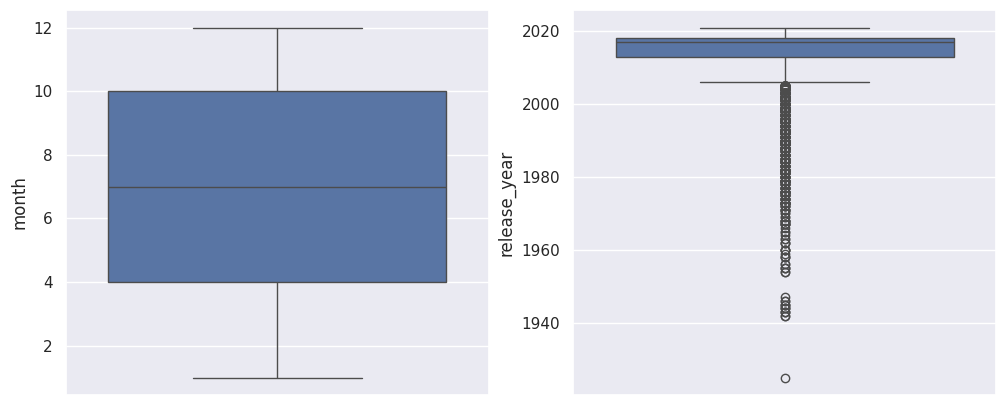

In [ ]:
# Handling Outliers & Outlier treatments
# Display boxplot

# plotting graph
fig,ax= plt.subplots(1,2, figsize=(12,5))

sns.boxplot(y='month',data=df_fe,ax=ax[0])
sns.boxplot(y='release_year',data=df_fe,ax=ax[1])

##### What all outlier treatment techniques have you used and why did you use those techniques?

Except month and release year all variables have texts. I need only text based features for clustering. So, no need to handle outliers.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
df_fe[['censor', 'type']] = df_fe[['censor', 'type']].astype('category')

In [ ]:
cat_text_df = df_fe[['type','censor']]

In [ ]:
#one hot encoding
cat_text_df = pd.get_dummies(cat_text_df, columns=['type', 'censor'])

In [ ]:
cat_text_df['type_Movie'] = cat_text_df['type_Movie'].astype(int)
cat_text_df['type_TV Show'] = cat_text_df['type_TV Show'].astype(int)
cat_text_df['censor_Kids'] = cat_text_df['censor_Kids'].astype(int)
cat_text_df['censor_Older Kids'] = cat_text_df['censor_Older Kids'].astype(int)
cat_text_df['censor_Teens'] = cat_text_df['censor_Teens'].astype(int)
cat_text_df['censor_Adults'] = cat_text_df['censor_Adults'].astype(int)

In [ ]:
cat_text_df

,type_Movie,type_TV Show,censor_Kids,censor_Older Kids,censor_Teens,censor_Adults
0,0,1,0,0,0,1
1,1,0,0,0,0,1
2,1,0,0,0,0,1
3,1,0,0,0,1,0
4,1,0,0,0,1,0
...,...,...,...,...,...,...
7782,1,0,0,0,0,1
7783,1,0,0,0,1,0
7784,1,0,0,0,0,1
7785,0,1,0,1,0,0


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7777 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       7777 non-null   object  
 1   type          7777 non-null   category
 2   title         7777 non-null   object  
 3   director      7777 non-null   object  
 4   cast          7777 non-null   object  
 5   country       7777 non-null   object  
 6   date_added    7777 non-null   object  
 7   release_year  7777 non-null   int64   
 8   rating        7777 non-null   object  
 9   duration      7777 non-null   object  
 10  listed_in     7777 non-null   object  
 11  description   7777 non-null   object  
 12  censor        7777 non-null   category
 13  month         7777 non-null   int32   
dtypes: category(2), int32(1), int64(1), object(10)
memory usage: 1.0+ MB


In [ ]:
df_fe['title'] = df_fe['title'].str.replace(' ', '')
df_fe['title']

,title
0,3%
1,7:19
2,23:59
3,9
4,21
...,...
7782,Zozo
7783,Zubaan
7784,ZuluManinJapan
7785,Zumbo'sJustDesserts


In [ ]:
df_fe['country'] = df_fe['country'].str.replace(' ', '')
df_fe['country']

,country
0,Brazil
1,Mexico
2,Singapore
3,UnitedStates
4,UnitedStates
...,...
7782,"Sweden,CzechRepublic,UnitedKingdom,Denmark,Net..."
7783,India
7784,Unavailable
7785,Australia


In [ ]:
df_fe['listed_in'] = df_fe.listed_in.apply(lambda row: row.split(', '))
df_fe.explode('listed_in')['listed_in'].unique()

array(['International TV Shows', 'TV Dramas', 'TV Sci-Fi & Fantasy',
       'Dramas', 'International Movies', 'Horror Movies',
       'Action & Adventure', 'Independent Movies', 'Sci-Fi & Fantasy',
       'TV Mysteries', 'Thrillers', 'Crime TV Shows', 'Docuseries',
       'Documentaries', 'Sports Movies', 'Comedies', 'Anime Series',
       'Reality TV', 'TV Comedies', 'Romantic Movies',
       'Romantic TV Shows', 'Science & Nature TV', 'Movies',
       'British TV Shows', 'Korean TV Shows', 'Music & Musicals',
       'LGBTQ Movies', 'Faith & Spirituality', "Kids' TV",
       'TV Action & Adventure', 'Spanish-Language TV Shows',
       'Children & Family Movies', 'TV Shows', 'Classic Movies',
       'Cult Movies', 'TV Horror', 'Stand-Up Comedy & Talk Shows',
       'Teen TV Shows', 'Stand-Up Comedy', 'Anime Features',
       'TV Thrillers', 'Classic & Cult TV'], dtype=object)

In [ ]:
replacing_genre = {'International TV Shows': '-',
                   'TV Dramas': 'Drama',
                   'TV Sci-Fi & Fantasy': 'SciFiFantasy',
                   'Dramas': 'Drama' ,
                   'International Movies': '-',
                   'Horror Movies': 'Horror',
                   'Action & Adventure': 'ActionAdventure',
                   'Independent Movies': '-',
                   'Sci-Fi & Fantasy': 'SciFiFantasy',
                  'TV Mysteries': 'Mystery'       ,
                  'Thrillers': 'Thriller',
                   'Crime TV Shows': 'Crime',
                   'Docuseries': 'Documentary',
                  'Documentaries': 'Documentary', 'Sports Movies': 'Sports',
                   'Comedies':'Comedy',
                   'Anime Series': 'Anime',
                  'Reality TV': 'Reality',
                   'TV Comedies': 'Comedy',
                   'Romantic Movies': 'Romance',
                  'Romantic TV Shows': 'Romance',
                   'Science & Nature TV': 'Science',
                   'Movies': '-',
                  'British TV Shows': '-',
                   'Korean TV Shows': '-',
                   'Music & Musicals': 'Music',
                  'LGBTQ Movies': 'LGBTQ',
                   'Faith & Spirituality': 'Spirituality',
                   "Kids' TV": 'Kids',
                  'TV Action & Adventure': 'ActionAdventure',
                   'Spanish-Language TV Shows': '-',
                  'Children & Family Movies': 'Family',
                   'TV Shows': '-',
                   'Classic Movies': 'Classic',
                  'Cult Movies': 'Cult',
                   'TV Horror': 'Horror',
                   'Stand-Up Comedy & Talk Shows':'Comedy, TalkShow',
                  'Teen TV Shows': 'Teen', 'Stand-Up Comedy':'Comedy',
                   'Anime Features':'Anime',
                  'TV Thrillers': 'Thriller',
                   'Classic & Cult TV':'Classic, Cult'}

In [ ]:
def genre_replace(row, replacing_genre = replacing_genre):
  new_text = []

  for word in (row['listed_in']):
    if word in replacing_genre:
      if '-' not in replacing_genre[word]:
       new_text.append(replacing_genre[word])
    else:
      print(word, 'not present in dictionary')

  return(', '.join(new_text))


df_fe['Genres'] = df_fe.apply(lambda row: genre_replace(row),axis=1)
df_fe['Genres'] = df_fe['Genres'].apply(lambda row: row.split(', '))

In [ ]:
df_fe.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,censor,month,Genres
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-Fi ...",In a future where the elite inhabit an island ...,Adults,8,"[Drama, SciFiFantasy]"
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...,Adults,12,[Drama]
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow...",Adults,12,[Horror]
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",UnitedStates,"November 16, 2017",2009,PG-13,80 min,"[Action & Adventure, Independent Movies, Sci-F...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,"[ActionAdventure, SciFiFantasy]"
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",UnitedStates,"January 1, 2020",2008,PG-13,123 min,[Dramas],A brilliant group of students become card-coun...,Teens,1,[Drama]


In [ ]:
#combining listed_in, directors and cast into single text

def combine(row):
  text = ' '.join(row['Genres']).lower()
  if row['cast'] != 'unknown':
    cast_list = [actor.replace(' ', '') for actor in row['cast'].split(', ')]
    if len(cast_list) < 5:
      text = text + ' ' + ' '.join(cast_list[:]).lower()
    else :
      text = text + ' ' + ' '.join(cast_list[:5]).lower()
  if row['director'] !='unknown':
    director_list = ' '.join([director.replace(' ', '') for director in row['director'].split(', ')])
    text = text + ' ' + director_list.lower()

  return text
df_fe['all_cast'] = df_fe.apply(lambda row: combine(row), axis = 1)

In [ ]:
df_fe.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,censor,month,Genres,all_cast
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-Fi ...",In a future where the elite inhabit an island ...,Adults,8,"[Drama, SciFiFantasy]",drama scififantasy joãomiguel biancacomparato ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...,Adults,12,[Drama],drama demiánbichir héctorbonilla oscarserrano ...


In [ ]:
df_fe['all_features']=df_fe['all_cast'].astype(str) + " " + df_fe['description'].astype(str) + " " + df_fe['title'].astype(str) + " " + df_fe['country'].astype(str)

In [ ]:
df_fe.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,censor,month,Genres,all_cast,all_features
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-Fi ...",In a future where the elite inhabit an island ...,Adults,8,"[Drama, SciFiFantasy]",drama scififantasy joãomiguel biancacomparato ...,drama scififantasy joãomiguel biancacomparato ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...,Adults,12,[Drama],drama demiánbichir héctorbonilla oscarserrano ...,drama demiánbichir héctorbonilla oscarserrano ...


In [ ]:
df_fe['all_features'][0]

'drama scififantasy joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. 3% Brazil'

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
def expand_contractions(text):
    try:
        return contractions.fix(text)
    except IndexError:
        return text

In [ ]:
df_fe['proc_all_features'] = df_fe['all_features'].apply(expand_contractions)

In [ ]:
df_fe['proc_all_features'][0]

'drama scififantasy joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. 3% Brazil'

#### 2. Lower Casing

In [ ]:
# Lower Casing
df_fe['proc_all_features'] = df_fe['proc_all_features'].apply(lambda x: x.lower())

In [ ]:
df_fe['proc_all_features'][0]

'drama scififantasy joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. 3% brazil'

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import string

df_fe['proc_all_features'] = df_fe['proc_all_features'].apply(lambda x: ''.join(c if c not in string.punctuation else ' ' for c in str(x)))

In [ ]:
df_fe['proc_all_features'][0]

'drama scififantasy joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira in a future where the elite inhabit an island paradise far from the crowded slums  you get one chance to join the 3  saved from squalor  3  brazil'

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
df_fe['proc_all_features'] = df_fe['proc_all_features'].apply(lambda x: re.sub('https?://[A-Za-z0-9./]+',' ', str(x)))

In [ ]:
df_fe['proc_all_features'][0]

'drama scififantasy joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira in a future where the elite inhabit an island paradise far from the crowded slums  you get one chance to join the 3  saved from squalor  3  brazil'

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [word for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

In [ ]:
df_fe['proc_all_features'] = df_fe['proc_all_features'].apply(lambda x: remove_stopwords(x))

In [ ]:
df_fe['proc_all_features'][0]

'drama scififantasy joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor 3 brazil'

In [ ]:
# Remove White spaces
df_fe['proc_all_features'] = df_fe['proc_all_features'].str.strip()

In [ ]:
df_fe['proc_all_features'][0]

'drama scififantasy joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor 3 brazil'

#### 6. Tokenization

In [ ]:
# Tokenization
!pip install nltk
import nltk

# Download the 'punkt_tab' data package
nltk.download('punkt_tab')

from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

# Function to find synonyms using WordNet
def find_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return synonyms

# Function to rephrase a sentence
def rephrase_sentence(sentence):
    tokens = word_tokenize(sentence)
    rephrased_sentence = []
    for token in tokens:
        synonyms = find_synonyms(token)
        if synonyms:
            rephrased_sentence.append(synonyms[0])  # Choose the first synonym as a replacement
        else:
            rephrased_sentence.append(token)
    return ' '.join(rephrased_sentence)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Apply the rephrasing function
df_fe['proc_all_features'] = df_fe['proc_all_features'].apply(rephrase_sentence)

In [ ]:
df_fe['proc_all_features'][0]

'play scififantasy joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira future elite populate island Eden Army_for_the_Liberation_of_Rwanda herd slum get one opportunity articulation three salvage sordidness three Brazil'

#### 7. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
#using Lemmatization
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return(''.join(lemmatized_tokens))

In [ ]:
df_fe['proc_all_features'] = df_fe['proc_all_features'].apply(lemmatize_tokens)

In [ ]:
df_fe['proc_all_features'][0]

'play scififantasy joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira future elite populate island Eden Army_for_the_Liberation_of_Rwanda herd slum get one opportunity articulation three salvage sordidness three Brazil'

##### Which text normalization technique have you used and why?

I used Lemmatization as a text normalization technique.

Lemmatization is the process of reducing words to their base or root form, similar to stemming.

But lemmatization uses a dictionary-based approach and considers the context of the word and grammatical structure in order to determine its base form, while stemming uses simple heuristics and does not consider the context of the word.

Lemmatization is often used in tasks such as text classification and information retrieval, where the meaning of the words is important.

#### 8. Part of speech tagging

In [ ]:
# POS Taging Not Required
# This should only be considered if the project involves tasks that rely significantly on grammatical analysis or the roles of words.

#### 9. Text Vectorization

In [ ]:
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the text data
vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', stop_words='english')
vectorizer.fit(df_fe['proc_all_features'])

TfidfVectorizer(min_df=10, stop_words='english', sublinear_tf=True)

In [ ]:
# Transform the text data into TF-IDF vectors
x= vectorizer.transform(df_fe['proc_all_features']).toarray()

print(f'shape of the vector : {x.shape}')

shape of the vector : (7777, 2318)


In [ ]:
x_vectorized=pd.DataFrame(x)

In [ ]:
x_vectorized

,0,1,2,3,4,5,6,7,8,9,...,2308,2309,2310,2311,2312,2313,2314,2315,2316,2317
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7772,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7773,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7774,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7775,0.302926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Which text vectorization technique have you used and why?

I used Tf-idf Vectorization technique.

TF-IDF (term frequency-inverse document frequency) is a technique that assigns a weight to each word in a document. It is calculated as the product of the term frequency (tf) and the inverse document frequency (idf).

The term frequency (tf) is the number of times a word appears in a document, while the inverse document frequency (idf) is a measure of how rare a word is across all documents in a collection.

The intuition behind tf-idf is that words that appear frequently in a document but not in many documents across the collection are more informative and thus should be given more weight.

It also helps to reduce the dimensionality of the data and increases the weight of important words, thus providing more informative and robust feature set for the model to work on.

### 6. Data Scaling

In [ ]:
# no need of scaling
cat_text_df

,type_Movie,type_TV Show,censor_Kids,censor_Older Kids,censor_Teens,censor_Adults
0,0,1,0,0,0,1
1,1,0,0,0,0,1
2,1,0,0,0,0,1
3,1,0,0,0,1,0
4,1,0,0,0,1,0
...,...,...,...,...,...,...
7782,1,0,0,0,0,1
7783,1,0,0,0,1,0
7784,1,0,0,0,0,1
7785,0,1,0,1,0,0


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is the process of reducing the number of features or dimensions in a dataset while retaining as much information as possible.It can help improve performance of models, reduce overfitting, and make it easier to visualize and interpret the data.

Since my dataset contains more columns than rows(7777, 2319), the computational cost of clustering increases. So, that I am going to use PCA for dimensionality reduction.

In [ ]:
# DImensionality Reduction (If needed)
# using PCA to reduce dimensionality
pca = PCA(random_state=40)
x_pca = pca.fit_transform(x_vectorized)

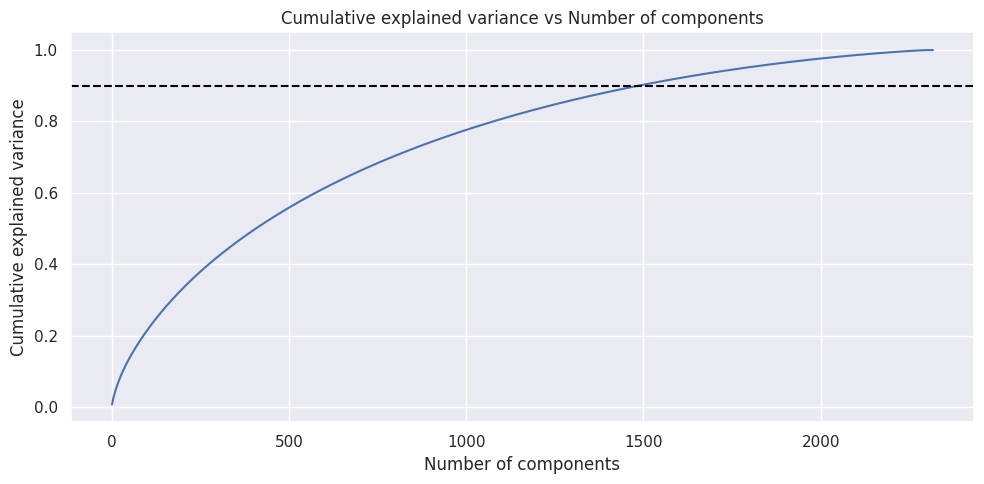

In [ ]:
#visualizing variance explained by number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative explained variance vs Number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.90, color='black', linestyle='--')
#plt.axvline(x= 1500, color='purple', linestyle='--')
#plt.xticks(ticks = np.arange(0,2300))
plt.tight_layout()
plt.show()

90% of the variance is explained by 1500 components, 80% is explained by 1000 components.I will build my model with 1500 components.

In [ ]:
pca = PCA(random_state=40,n_components=1500)
pca.fit(x_vectorized)

PCA(n_components=1500, random_state=40)

In [ ]:
# transformed features
x_trans = pca.transform(x_vectorized)

# shape of transformed vectors
x_trans.shape

(7777, 1500)

In [ ]:
x_trans

array([[-1.69263340e-02, -2.42239157e-02, -4.35969128e-02, ...,
        -7.17139963e-03,  1.94084223e-02,  5.21200501e-03],
       [-1.19705835e-02, -3.30468165e-02,  1.42353345e-04, ...,
        -1.33508921e-02, -8.62476198e-03, -8.85815144e-03],
       [-1.65883207e-03, -1.60139571e-02, -9.14076329e-02, ...,
        -2.58206052e-03,  1.41244102e-03,  7.32561352e-03],
       ...,
       [ 1.73546802e-01, -2.00496092e-02,  9.47867895e-02, ...,
         1.79169921e-02,  1.52740027e-02,  5.99359642e-03],
       [ 2.88139490e-02,  5.53386839e-03, -1.61000310e-02, ...,
        -2.94582886e-03, -2.37444158e-02, -2.07413942e-02],
       [ 3.04100786e-01, -4.88868204e-02,  9.89051090e-02, ...,
         2.40939155e-03, -3.08307119e-03,  1.58533855e-02]])

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used Principal Component Analysis because it is able to identify patterns in the data that are responsible for the most variation.

These patterns, known as principal components, are linear combinations of the original features that are uncorrelated with each other.

By using the first few principal components, which account for the majority of the variation in the data, one can effectively reduce the dimensionality of the data while maintaining most of the important information.

## ***7. ML Model Implementation***

### ML Model - 1

K-means is an unsupervised learning algorithm that aims to divide an unlabeled dataset into k clusters by minimizing the sum of distances between data points and their assigned cluster centroids. The value of k needs to be predefined. The algorithm iteratively determines the best centroids and assigns each data point to its closest centroid, forming clusters. Two common methods to determine the optimal value of k are the elbow method, which looks for the point of diminishing returns in the within-cluster sum of squares, and the silhouette method, which measures the similarity of data points within their own cluster compared to other clusters.

In [ ]:
clustering_score = {
    'Algorithm':[],
    'Clusters':[],
    'Silhouette Score':[],
    'Davies-Bouldin Index': []
}

In [ ]:
def update_report(algo_name,clusters, sil_score, db_index):
  data = [algo_name,clusters,sil_score, db_index]
  for i,j in enumerate(clustering_score):
    clustering_score[j].append(data[i])

In [ ]:
final_df = pd.DataFrame(netflix_data)
final_array = final_df.to_numpy()

In [ ]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(final_df['description'])

# ML Model - 1 Implementation
clusters = [i for i in range(2, 26)]  # Cluster range from 2 to 25
silhouette_avg = []
Sum_of_squared_distances = []

# Convert 'final_df' to numerical representation using only numerical features
# Assuming 'final_df' has columns with mixed data types
numerical_features = final_df.select_dtypes(include=['number']).columns
final_array = final_df[numerical_features].to_numpy()

# Fit the KMeans Algorithm for different cluster sizes
for num_clusters in clusters:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10, random_state=40)
    kmeans.fit(tfidf_matrix)  # Now tfidf_matrix is defined and can be used here

    # Get the labels assigned by KMeans
    cluster_labels = kmeans.labels_

    # Calculate silhouette score using the numerical representation of the data
    silhouette_avg.append(silhouette_score(final_array, cluster_labels))

    # Get the sum of squared distances (inertia)
    Sum_of_squared_distances.append(kmeans.inertia_)

# Optionally, print the results or plot them
print("Silhouette Scores:", silhouette_avg)
print("Sum of Squared Distances (Inertia):", Sum_of_squared_distances)

Silhouette Scores: [-0.07604755146366336, -0.09263974674742809, -0.0993941318089297, -0.10612909877782051, -0.10854726253727952, -0.22972448631659606, -0.14389896143641098, -0.14161070030638523, -0.1404497539906355, -0.2187804437171349, -0.2475351435660113, -0.1547993322016401, -0.20232172416991437, -0.1477085428650486, -0.1997511840733101, -0.26453728755378747, -0.2979947748954034, -0.26972297015034247, -0.25492543641137877, -0.2854765427460636, -0.2880312872506346, -0.2960866728885976, -0.25851414001154327, -0.27048733634310124]
Sum of Squared Distances (Inertia): [7600.5236851414775, 7575.019597501356, 7558.604257318506, 7545.536812355578, 7535.182598949746, 7526.554981967222, 7517.123551612255, 7510.314870858111, 7502.183969773004, 7494.208797549748, 7492.285032688156, 7484.452955023611, 7479.12322567569, 7473.531072697887, 7468.636189675644, 7466.155175083351, 7463.136480761976, 7456.121819081754, 7451.921071507645, 7443.301249598368, 7442.586614637413, 7440.848625525989, 7436.559

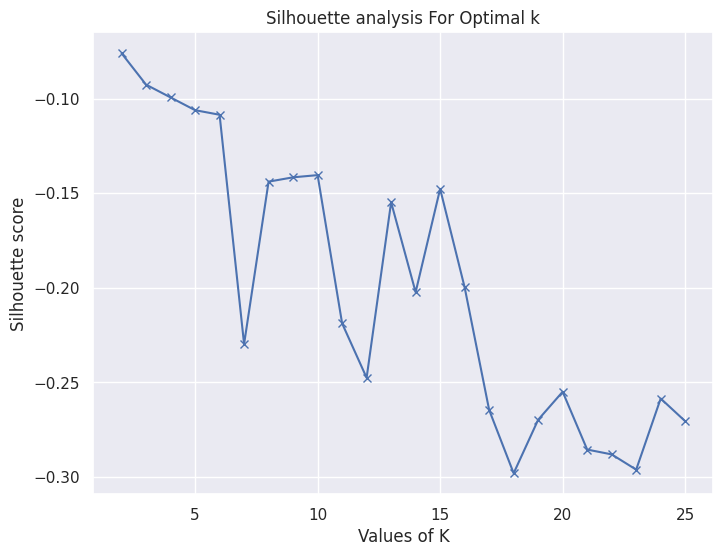

In [ ]:
 # silhouette score
plt.figure(figsize=(8,6))
plt.plot(clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

It looks like peak is at 8 clusters. let's look at Elbow method

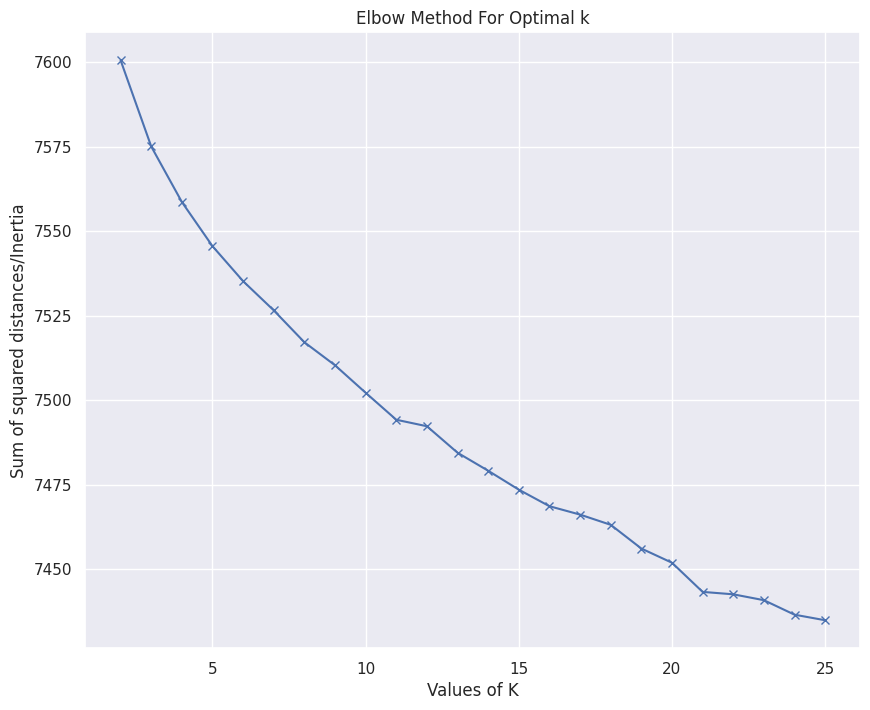

In [ ]:
# Elbow method

plt.figure(figsize=(10,8))
plt.plot(clusters,Sum_of_squared_distances,'bx-')

plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

There is clear deviation 8. lets look at silhouette score for each cluster to determine k value.

In [ ]:
#from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters,init='k-means++',n_init=10, random_state=40)
      preds = km.fit_predict(final_array)
      centers = km.cluster_centers_

      score = silhouette_score(final_array, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(final_array) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

For n_clusters = 2, silhouette score is 0.8166305963332489


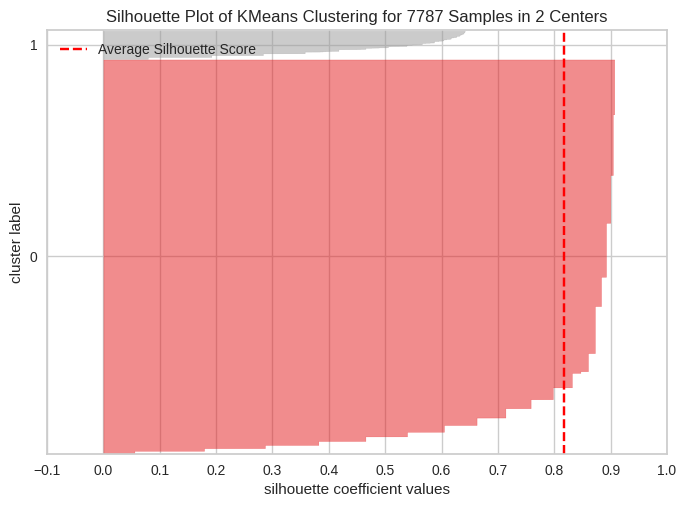

For n_clusters = 3, silhouette score is 0.7197656589334842


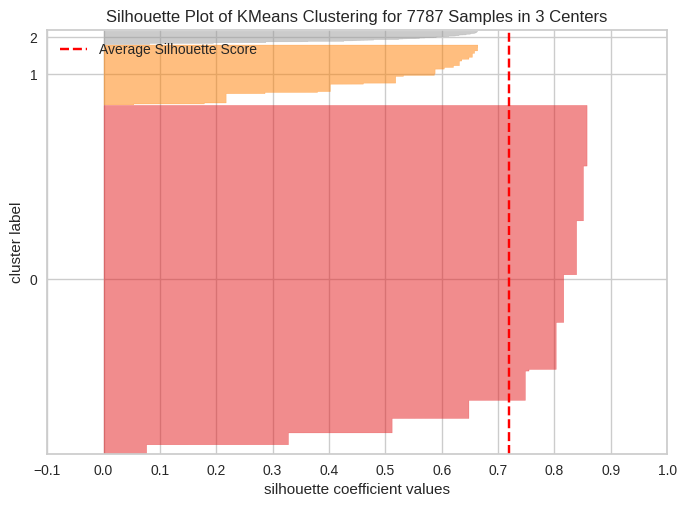

For n_clusters = 4, silhouette score is 0.6720285514652558


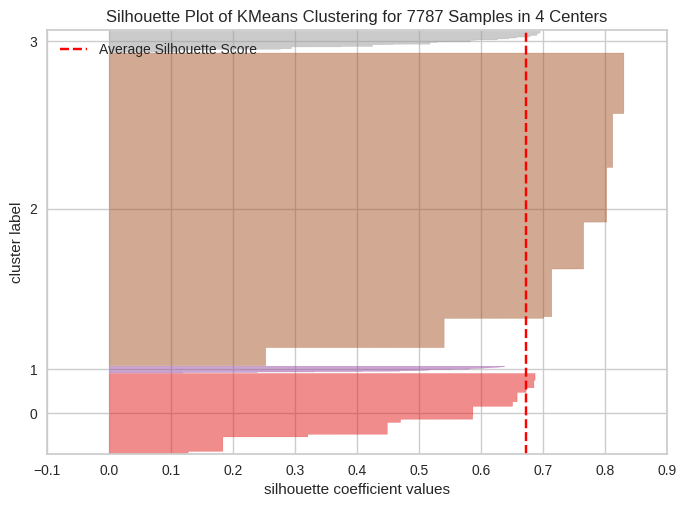

For n_clusters = 5, silhouette score is 0.6413784006955073


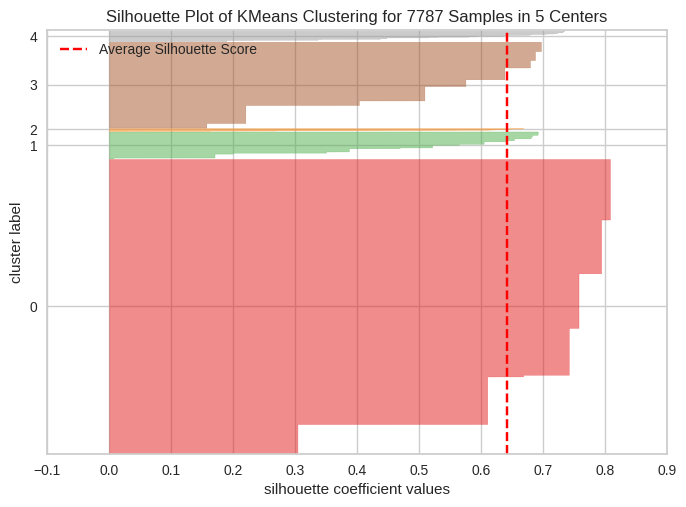

For n_clusters = 6, silhouette score is 0.5894334062583712


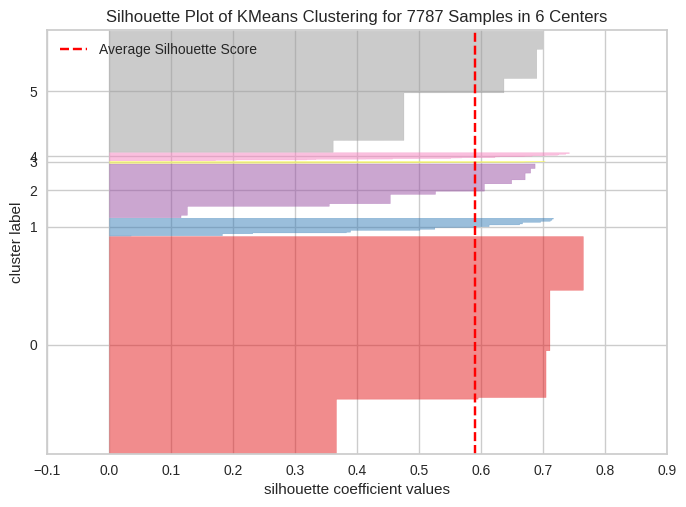

For n_clusters = 7, silhouette score is 0.6007704395472167


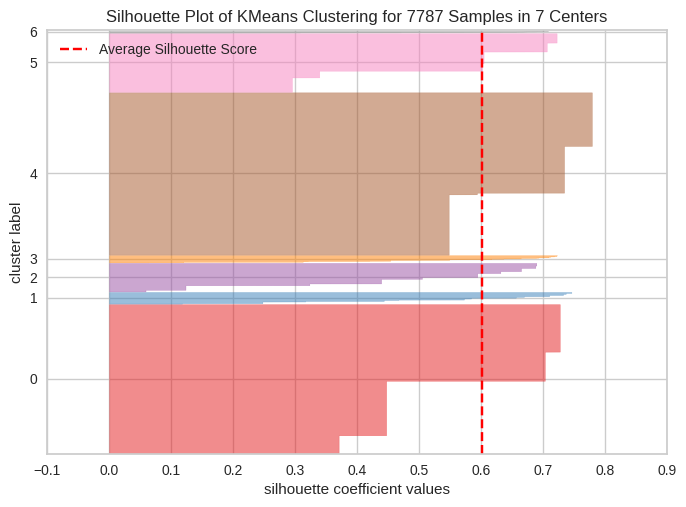

For n_clusters = 8, silhouette score is 0.6008377640777492


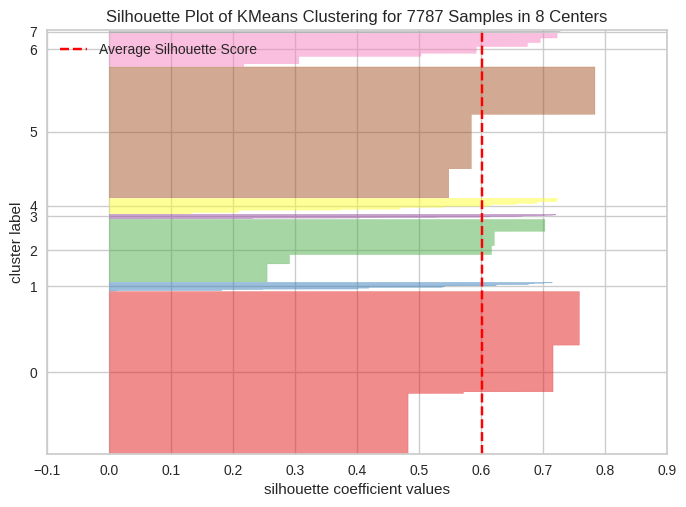

For n_clusters = 9, silhouette score is 0.5970545041524972


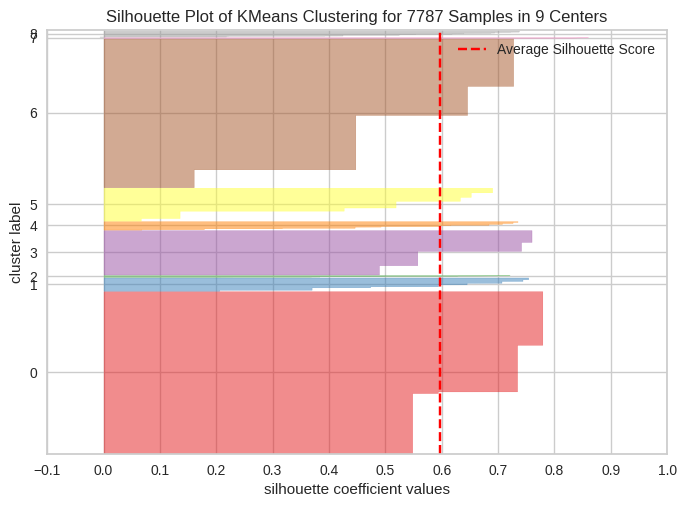

For n_clusters = 10, silhouette score is 0.610514165821699


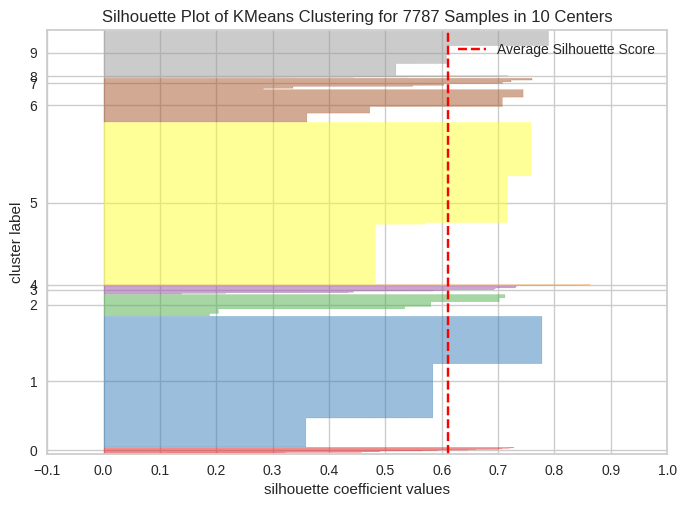

For n_clusters = 11, silhouette score is 0.650622262920933


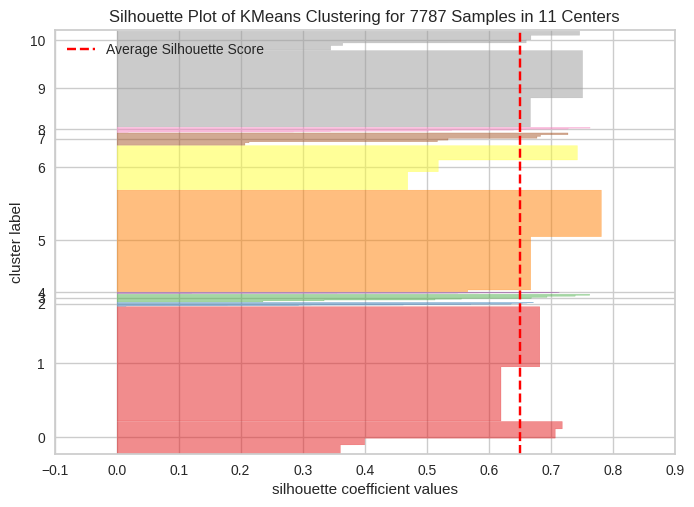

In [ ]:
silhouette_score_analysis(12)

In [ ]:
#fitting model at k=8
kmeans = KMeans(n_clusters=8, init='k-means++', random_state=40,n_init=10)
kmeans.fit(final_array)


#prediction
predictions = kmeans.fit_predict(final_array)

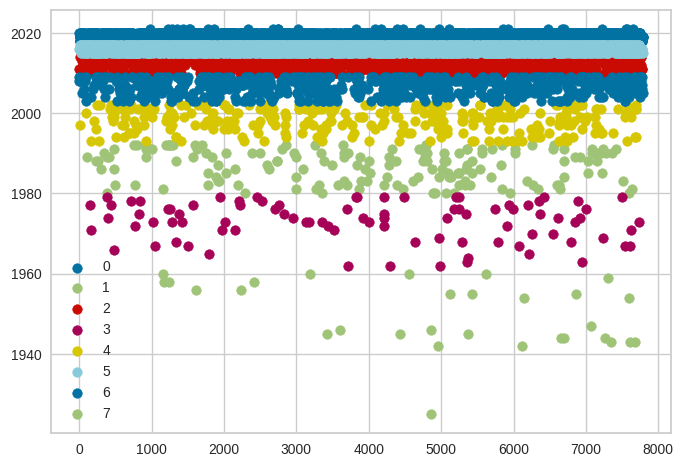

In [ ]:
#visualizing unique clusters
unique_pred = np.unique(predictions)

#plotting the results:
x_values = np.arange(len(final_array))

for i in unique_pred:
    plt.scatter(x_values[predictions == i], final_array[predictions == i, 0], label=i)
plt.legend()
plt.show()

In [ ]:
# Evaluation metrics  Silhouette score,davies_bouldin_score

kmeans_silhouette_score = silhouette_score(final_array, predictions)
kmeans_davies_bouldin_score=davies_bouldin_score(final_array,predictions)
print( kmeans_silhouette_score)
print( kmeans_davies_bouldin_score)

0.6008377640777492
0.5060549034722125


In [ ]:
update_report('KMeans', pd.Series(predictions).nunique(), kmeans_silhouette_score, kmeans_davies_bouldin_score)

In [ ]:
# Adding a kmeans cluster number attribute
predictions = predictions[:len(df_fe)]

df_fe['kmeans_clusters'] = predictions

In [ ]:
df_fe

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,censor,month,Genres,all_cast,all_features,proc_all_features,kmeans_clusters
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-Fi ...",In a future where the elite inhabit an island ...,Adults,8,"[Drama, SciFiFantasy]",drama scififantasy joãomiguel biancacomparato ...,drama scififantasy joãomiguel biancacomparato ...,play scififantasy joãomiguel biancacomparato m...,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...,Adults,12,[Drama],drama demiánbichir héctorbonilla oscarserrano ...,drama demiánbichir héctorbonilla oscarserrano ...,play demiánbichir héctorbonilla oscarserrano a...,5
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow...",Adults,12,[Horror],horror teddchan stellachung henleyhii lawrence...,horror teddchan stellachung henleyhii lawrence...,horror teddchan stellachung henleyhii lawrence...,2
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",UnitedStates,"November 16, 2017",2009,PG-13,80 min,"[Action & Adventure, Independent Movies, Sci-F...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,"[ActionAdventure, SciFiFantasy]",actionadventure scififantasy elijahwood johnc....,actionadventure scififantasy elijahwood johnc....,actionadventure scififantasy elijahwood johnc ...,6
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",UnitedStates,"January 1, 2020",2008,PG-13,123 min,[Dramas],A brilliant group of students become card-coun...,Teens,1,[Drama],drama jimsturgess kevinspacey katebosworth aar...,drama jimsturgess kevinspacey katebosworth aar...,play jimsturgess kevinspacey katebosworth aaro...,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden,CzechRepublic,UnitedKingdom,Denmark,Net...","October 19, 2020",2005,TV-MA,99 min,"[Dramas, International Movies]",When Lebanon's Civil War deprives Zozo of his ...,Adults,10,[Drama],drama imadcreidi antoinetteturk eliasgergi car...,drama imadcreidi antoinetteturk eliasgergi car...,play imadcreidi antoinetteturk eliasgergi carm...,5
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"[Dramas, International Movies, Music & Musicals]",A scrappy but poor boy worms his way into a ty...,Teens,3,"[Drama, Music]",drama music vickykaushal sarah-janedias raagha...,drama music vickykaushal sarah-janedias raagha...,play music vickykaushal Sarah janedias raaghav...,5
7784,s7785,Movie,ZuluManinJapan,unknown,Nasty C,Unavailable,"September 25, 2020",2019,TV-MA,44 min,"[Documentaries, International Movies, Music & ...","In this documentary, South African rapper Nast...",Adults,9,"[Documentary, Music]",documentary music nastyc,"documentary music nastyc In this documentary, ...",documentary music nastyc documentary South Afr...,6
7785,s7786,TV Show,Zumbo'sJustDesserts,unknown,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"[International TV Shows, Reality TV]",Dessert wizard Adriano Zumbo looks for the nex...,Older Kids,10,[Reality],reality adrianozumbo rachelkhoo,reality adrianozumbo rachelkhoo Dessert wizard...,world adrianozumbo rachelkhoo dessert ace adri...,0


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

def func_select_Category(cluster_label, column_of_choice):
    df_word_cloud = df_fe[['kmeans_clusters', column_of_choice]].dropna()
    df_word_cloud = df_word_cloud[df_word_cloud['kmeans_clusters'] == cluster_label]

    # Flatten the lists into a single string
    text = " ".join(word for sublist in df_word_cloud[column_of_choice] for word in sublist)

    # Create stopword list
    stopwords = set(STOPWORDS)

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)

    # Plot the word cloud
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Cluster: {cluster_label}', fontsize=18, fontweight='bold')
    plt.axis("off")
    plt.show()

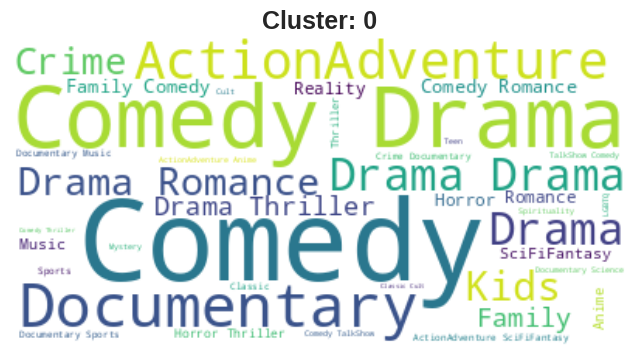

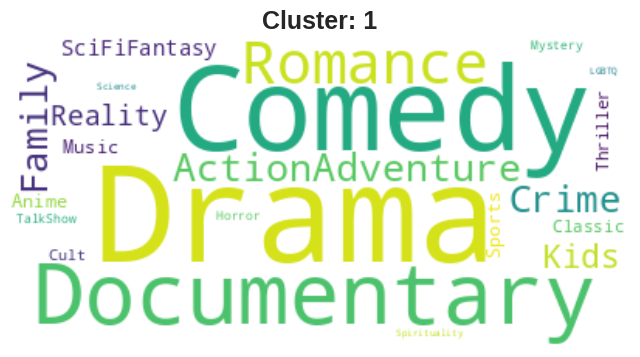

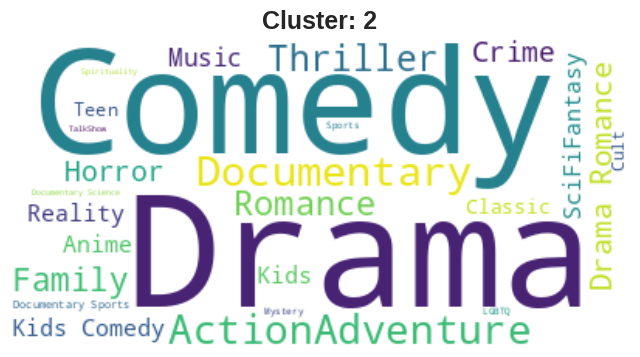

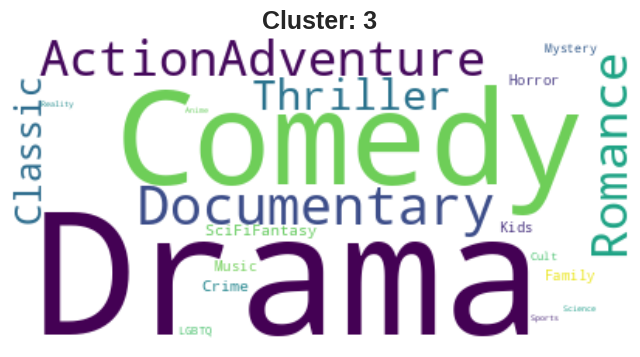

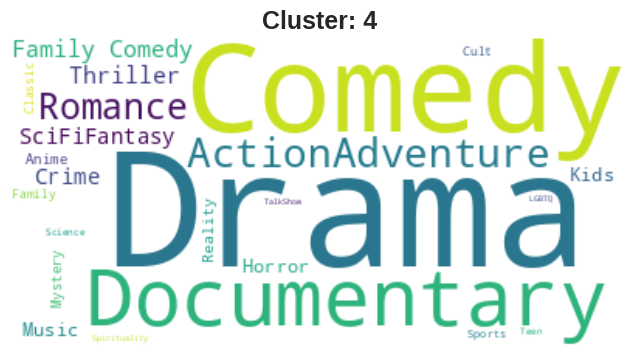

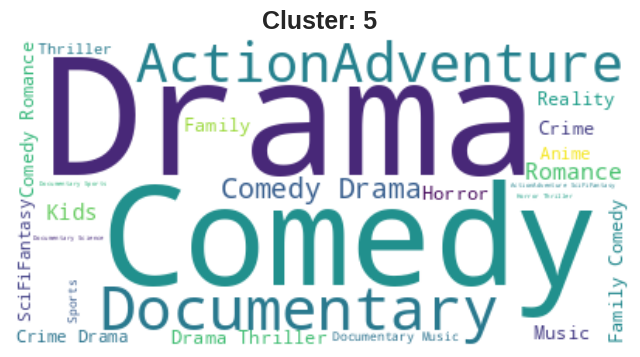

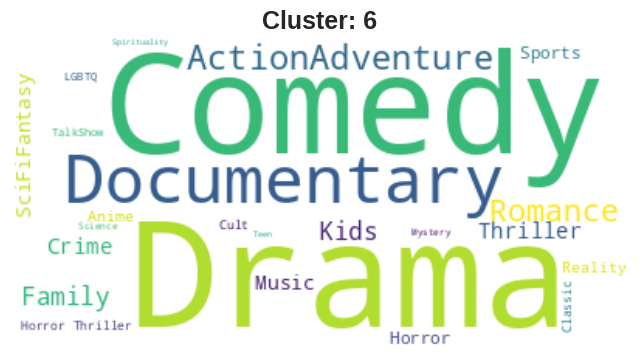

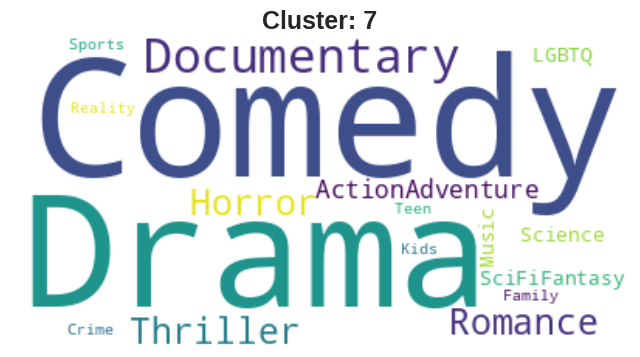

In [ ]:
for i in range(8):
  func_select_Category(i,'Genres')

It can be seen that each cluster, each genre is more in number like for cluster 0 has drama and comedy, cluster 1 has dram and action adventure, cluster 2 has kids and reality, cluster 3 has drama and documentary, cluster 4 has kids and comedy, cluster 5 has romance and drama, cluster 6 has comedy and crime and cluster 7 has family.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
pd.DataFrame(clustering_score)

,Algorithm,Clusters,Silhouette Score,Davies-Bouldin Index
0,KMeans,8,0.600838,0.506055


Silhouette score range is -1 to 1 and more the score is better the clustering, here 0.600838 for 8 clusters and Davies-Bouldin score range is 0 to infinty, the lower or closer to 0 is better the clustering, here 0.506055 for 8 clusteres. clusters are wee formed but lets do hierarichal clustering

### ML Model - 2  HIERARCHICAL CLUSTERING
Hierarchical clustering is a clustering algorithm that groups similar data points into clusters based on their pairwise distances. It starts with each data point as a separate cluster and gradually merges them to form larger clusters. The algorithm builds a hierarchy of clusters using a bottom-up or agglomerative approach. At each step, the two closest clusters are merged based on a specified distance metric. Hierarchical clustering does not require specifying the number of clusters in advance, allowing the structure of the data to naturally emerge from the clustering process.

In [ ]:
import scipy.cluster.hierarchy as sch
hierarchy = sch.linkage(final_array, method = 'ward', metric = 'euclidean')

#Dendrogram
A dendrogram is a tree-like diagram used to display the relationships between data points in a hierarchical clustering algorithm. It displays the distance between each pair of data points and how they are grouped into clusters.

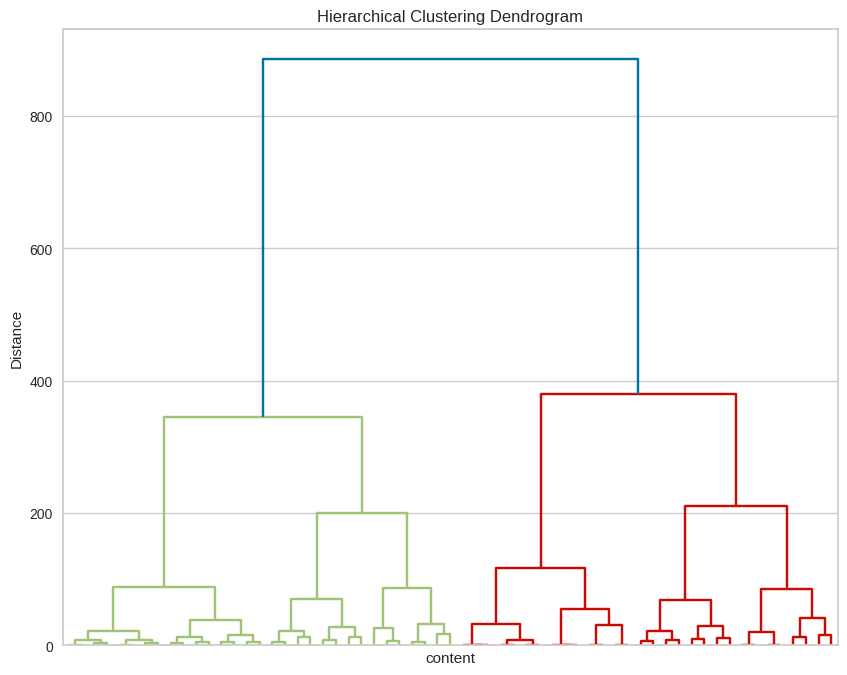

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# HIERARCHICAL CLUSTERING
distances_linkage = linkage(final_array,
                            method = 'ward',
                            metric = 'euclidean')

plt.figure(figsize=(10, 8))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('content')
plt.ylabel('Distance')

# Truncate the dendrogram to manage recursion depth
dendrogram(
    distances_linkage,
    no_labels = True,
    truncate_mode='level',  # Show only a specific number of levels
    p=5  # Display 5 levels of the dendrogram
)

plt.show()

#AgglomerativeClustering
Agglomerative Clustering is a bottom up hierarchical clustering algorithm that recursively merges similar clusters based on a linkage criterion.

In [ ]:
clusters = []
scores = []
distances = []
for i in np.arange(5, 65, 5):
    hc = AgglomerativeClustering(n_clusters=None, distance_threshold=i, linkage='ward')
    y_hc = hc.fit_predict(final_array)
    clusters.append(hc.labels_.max() + 1)
    if (hc.labels_.max() + 1 >= 2):
        scores.append(silhouette_score(final_array, y_hc))
    else:
        scores.append(1)
    distances.append(i)

hierarchical = pd.DataFrame({'Clusters': clusters,
                             'Silhouette Scores': scores,
                             'Distance': distances})

In [ ]:
hierarchical.sort_values('Silhouette Scores', ascending = False).head()

,Clusters,Silhouette Scores,Distance
0,45,0.981779,5
1,33,0.949199,10
2,28,0.918174,15
3,25,0.893668,20
4,21,0.849140,25


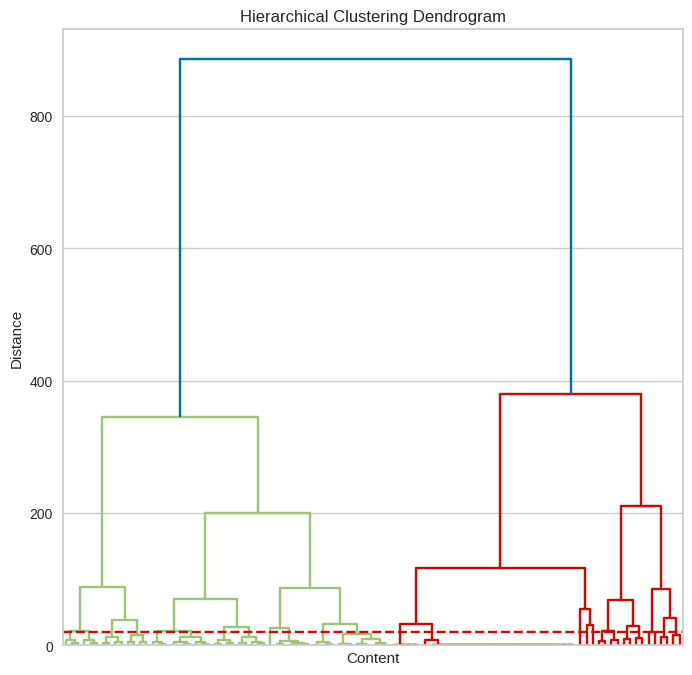

In [ ]:
import sys
sys.setrecursionlimit(1000)

distances_linkage = linkage(final_array, method='ward', metric='euclidean')

plt.figure(figsize=(8, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Content')
plt.ylabel('Distance')

dendrogram(distances_linkage,
           no_labels=True,
           truncate_mode='lastp',
           p=100)  # Adjust 'p' as needed


# Draw a horizontal line at y = 20
plt.axhline(y=20, color='r', linestyle='--')

plt.show()

At 20, it gives us 8 clusters with high silhouette score. from K means also we got 8 clusters.

In [ ]:
hc = AgglomerativeClustering(n_clusters=8, linkage='ward')
preds_hc = hc.fit_predict(final_array)

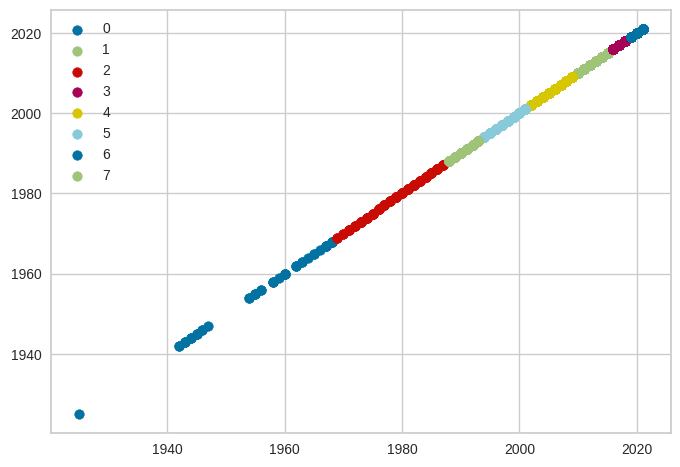

In [ ]:
#visualizing clusters
unique_pred_hc = np.unique(preds_hc)

#plotting the results:
for i in unique_pred_hc:
    plt.scatter(final_array[preds_hc == i, 0], final_array[preds_hc == i, 0], label=i)
plt.legend()
plt.show()

In [ ]:
preds_hc = preds_hc[:df_fe.shape[0]]
df_fe['Hierarchical_clustering']=preds_hc
df_fe.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,censor,month,Genres,all_cast,all_features,proc_all_features,kmeans_clusters,Hierarchical_clustering
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-Fi ...",In a future where the elite inhabit an island ...,Adults,8,"[Drama, SciFiFantasy]",drama scififantasy joãomiguel biancacomparato ...,drama scififantasy joãomiguel biancacomparato ...,play scififantasy joãomiguel biancacomparato m...,0,6
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...,Adults,12,[Drama],drama demiánbichir héctorbonilla oscarserrano ...,drama demiánbichir héctorbonilla oscarserrano ...,play demiánbichir héctorbonilla oscarserrano a...,5,3
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow...",Adults,12,[Horror],horror teddchan stellachung henleyhii lawrence...,horror teddchan stellachung henleyhii lawrence...,horror teddchan stellachung henleyhii lawrence...,2,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",UnitedStates,"November 16, 2017",2009,PG-13,80 min,"[Action & Adventure, Independent Movies, Sci-F...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,"[ActionAdventure, SciFiFantasy]",actionadventure scififantasy elijahwood johnc....,actionadventure scififantasy elijahwood johnc....,actionadventure scififantasy elijahwood johnc ...,6,4
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",UnitedStates,"January 1, 2020",2008,PG-13,123 min,[Dramas],A brilliant group of students become card-coun...,Teens,1,[Drama],drama jimsturgess kevinspacey katebosworth aar...,drama jimsturgess kevinspacey katebosworth aar...,play jimsturgess kevinspacey katebosworth aaro...,6,4


In [ ]:
# Evaluation metrics  Silhouette score,davies_bouldin_score

hc_silhouette_score = silhouette_score(final_array, preds_hc)
hc_davies_bouldin_score=davies_bouldin_score(final_array,preds_hc)
print( hc_silhouette_score)
print( hc_davies_bouldin_score)

ValueError: Found input variables with inconsistent numbers of samples: [7787, 7777]

In [ ]:
final_array_subset = final_array[df_fe.index]  # Select rows of final_array corresponding to df_fe

# Now calculate the silhouette score using the subset of final_array
hc_silhouette_score = silhouette_score(final_array_subset, preds_hc)
hc_davies_bouldin_score = davies_bouldin_score(final_array_subset, preds_hc)

print(hc_silhouette_score)
print(hc_davies_bouldin_score)

-0.2899490378556343
72.3809492353173


In [ ]:
update_report('Hierarchical Agglomerative' ,pd.Series(preds_hc).nunique(),hc_silhouette_score, hc_davies_bouldin_score)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
pd.DataFrame(clustering_score)

,Algorithm,Clusters,Silhouette Score,Davies-Bouldin Index
0,KMeans,8,0.600838,0.506055
1,Hierarchical Agglomerative,8,-0.289949,72.380949


Based on both the Silhouette Score and the Davies-Bouldin Index, **KMeans with 8 clusters appears to have performed significantly better than Hierarchical Agglomerative Clustering with 8 clusters for your data.** The KMeans clusters are more distinct and internally cohesive, while the Hierarchical Agglomerative Clustering result suggests poorly defined or overlapping clusters.

I used

Silhouette Coefficient(-1 to 1): It measures the compactness and separation of clusters. A higher silhouette coefficient indicates well-separated clusters with instances closely related to their own cluster and distinct from other clusters.

Davies-Bouldin Index(0 to infinity): It quantifies the clustering quality based on the intra-cluster similarity and inter-cluster dissimilarity. A lower Davies-Bouldin index indicates better-defined clusters.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
pd.DataFrame(clustering_score)

,Algorithm,Clusters,Silhouette Score,Davies-Bouldin Index
0,KMeans,8,0.600838,0.506055
1,Hierarchical Agglomerative,8,-0.289949,72.380949


Considering both evaluation metrics,**KMeans with 8 clusters demonstrates superior performance in terms of cluster separation and internal cohesion compared to Hierarchical Agglomerative Clustering with 8 clusters.** Therefore, KMeans is the recommended choice for your final prediction model.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Evaluation Metrics and Business Implications

Here are some common metrics used for recommender systems and how they relate to business goals:

**Precision@k:**

**Definition**: Out of the top k recommendations given to a user, what proportion were actually relevant (e.g., the user watched or rated them positively)?

**Business Indication:** Measures the accuracy of the recommendations. A higher precision means the model is suggesting items users are genuinely interested in.

**Business Impact:** Increased user engagement, satisfaction, and potentially higher conversion rates (e.g., more movie watches, subscriptions, etc.).

**2.Recall@k:**

Definition: Out of all the relevant items for a user, what proportion did the model recommend within the top k recommendations?

Business Indication: Measures the model's ability to discover relevant items from the vast catalog. Higher recall means the model is surfacing a greater portion of potentially interesting content.

Business Impact: Helps users discover more content they might like, leading to broader content consumption and increased platform usage.

F1-Score@k:

Definition: The harmonic mean of precision and recall at k. Provides a balanced view of the model's performance, considering both accuracy and coverage.

Business Indication: A good F1-score indicates a model that delivers accurate and comprehensive recommendations.

Business Impact: Optimizes both user satisfaction and content discovery, leading to a more engaging and valuable user experience.

Mean Average Precision (MAP):

Definition: Average precision across all users, considering the ranking of recommendations. Takes into account the order in which relevant items are presented.

Business Indication: Reflects the overall quality of the recommendation rankings for all users.

Business Impact: Provides a holistic view of the model's effectiveness in delivering relevant and engaging recommendations to the entire user base.

Coverage:

Definition: The proportion of items in the catalog that the model is able to recommend.

Business Indication: Indicates the breadth of the model's recommendations. Low coverage may mean the model is limited in its recommendations and may not be effectively utilizing the entire content library.

Business Impact: Helps ensure a diverse range of content is recommended, preventing users from feeling limited to a small selection.

Novelty:

Definition: The extent to which the recommendations are surprising or unexpected to the user.

Business Indication: Measures the model's ability to go beyond the obvious and introduce users to new content they might not have discovered on their own.

Business Impact: Can enhance user experience by introducing fresh and interesting content, promoting exploration and discovery.

Diversity:

Definition: The variety of items recommended to a user (e.g., across genres, directors, actors, etc.).

Business Indication: Reflects the model's ability to provide a well-rounded set of recommendations, avoiding over-concentration on a single type of content.

Business Impact: Enhances user experience by catering to a wider range of interests and preferences, potentially leading to increased content consumption.

Business Impact of the ML Model:

A well-performing recommendation system using cosine similarity can have a significant positive impact on a business like Netflix:

Increased User Engagement: Users are more likely to stay on the platform and consume more content when they are presented with relevant recommendations.

Higher Customer Satisfaction: Personalized recommendations improve the user experience, leading to greater satisfaction and potentially higher customer loyalty.

Reduced Churn: By keeping users engaged and satisfied, recommendations can help reduce subscription cancellations.

Increased Revenue: More content consumption can lead to greater revenue through subscriptions, advertising, or other monetization strategies.

Content Discovery: Recommendations help users explore the vast content library and find hidden gems they might have missed otherwise, increasing the value proposition of the platform.

By tracking and optimizing these evaluation metrics, businesses can fine-tune their recommendation models to achieve their desired business outcomes. I hope this provides a clear explanation of the business implications of these metrics!

#Recommendation system

A content-based recommendation system is a type of recommendation system that suggests items to users based on the similarity of their attributes or features. In the case of movies and shows, we can use cosine similarity to calculate the similarity scores between them,it handles high dimensional sparse data better.By comparing the attributes or features of different shows, we can determine how similar they are to each other. This information can be used to create a content-based recommender system that suggests shows to users based on their similarity to the ones they have shown interest in.

In [ ]:
rec_df=df_fe[['title','proc_all_features']]
rec_df.head()

,title,proc_all_features
0,3%,play scififantasy joãomiguel biancacomparato m...
1,7:19,play demiánbichir héctorbonilla oscarserrano a...
2,23:59,horror teddchan stellachung henleyhii lawrence...
3,9,actionadventure scififantasy elijahwood johnc ...
4,21,play jimsturgess kevinspacey katebosworth aaro...


In [ ]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

In [ ]:
#get the tf-idf scores
#create TF-IDF matrix by fitting and transforming the data
tfidf_mat = tfidf.fit_transform(rec_df['proc_all_features'])

#shape of tfidf_matrix
tfidf_mat.shape

(7777, 44003)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(tfidf_mat)

In [ ]:
content=netflix_data_copy['title'].to_list()

In [ ]:
# return similar 5contents
def recommend(title, cosine_similarity=cos_sim):
    index = content.index(title)         #finds the index of the input title in the content_list.
    sim_score = list(enumerate(cos_sim[index]))

    sim_score = sorted(sim_score, key= lambda x: x[1], reverse=True)[1:6]
    recommend_index = [i[0] for i in sim_score]
    rec_content = rec_df['title'].iloc[recommend_index]
    rec_score = [round(i[1],4) for i in sim_score]
    rec_table = pd.DataFrame(list(zip(rec_content,rec_score)), columns=['Recommended content','Similarity(0-1)'])
    return rec_table

In [ ]:
recommend("Indiana Jones and the Last Crusade")

,Recommended content,Similarity(0-1)
0,IndianaJonesandtheRaidersoftheLostArk,0.3339
1,IndianaJonesandtheTempleofDoom,0.2416
2,IndianaJonesandtheKingdomoftheCrystalSkull,0.2027
3,Civilizations,0.1442
4,Fate/Apocrypha,0.1410


In [ ]:
recommend('Breaking Bad')

,Recommended content,Similarity(0-1)
0,TheFrozenGround,0.1117
1,Dismissed,0.0976
2,TheMessYouLeaveBehind,0.0961
3,TheBadKids,0.0956
4,187,0.0938


In [ ]:
recommend('Ozark')

,Recommended content,Similarity(0-1)
0,ArrestedDevelopment,0.0934
1,NowMoreThanEver:TheHistoryofChicago,0.0873
2,SecretsofAlthorp-TheSpencers,0.0754
3,Don'tGoBreakingMyHeart,0.0750
4,PrimalFear,0.0749


# **Conclusion**

The goal of this project is to do exploratary data analyes on netflix data, what type content present in different countries, whether netflix focusing on tv shows more rather than movies and clustering similar content.

EDA:

1. It is observed that movies are more on netflix than Tv shows and the platform has been adding more content from 2017 than before.Maximum number of content is released in the month of October and january which is a holiday season.

2. More content on netflix falls under rating Tv-MA which is nothing but Adult content and most number of adult content is produced in USA followed by UK.

3. USA and India are the top two countries with more content. Also, in each country movies are more than tv shows. In India, Teen rated content is high.

4. Top genres are International content, Drama, and comedy. Top directors are Jan Suter and Raul Campos. Top actors are Anupam kher and sharukh khan.

5. Most movies has duration of 50 -150 minutes and most tv shows are with 1 season.

6. Netflix is focusing more on tvshows than movies in recent years from 2017,it is also proved in hypothesis testing.

Data Preprocessing:

1. I only took features with texts in this project. I cosidered title,cast,director,genre which is a new feature developed from listed_in, censor from rating,description, type and country.

2. Type and censor are categorical, so encoded them using one hot encoding and joined remaining features into one column as all_features.

3. Applied all textual preprocessing techniques like lowercasing,removing punctuations,removing stopwords,text normalization (Stemming and Lematization)and text vectorization(used tfidf).

4. size of the dataset became (7777,2319) used PCA to reduce dimensionality reduction, observed that 90% variance is being explained by 1500 components,so did clustering with 1500 components.

Clustering:
1. Kmeans, using silhouette analysis and Elbow method the best model produced a silhouette score of 0.3 with 8 clusters. It also has davis-bould score of 1.39.

2. Agglomarative Hierarchical clustering using dendrogram produced a silhouette score of 0.316 similar to kmeans and davis-bound score of 1.33 with 8 clusters.

Finally, I developed a recommendation system using cosine similarity on tfid matrix which recommend content simialr content.

It is worth to note that if features like subscribers count, number of views are given in the dataset, then more things can be analysed like whether duration has effect on subscribers views or subscriptions and lot more.

Based on the evaluation metrics and business objective, both kmeans and Agglomarative hierarchical clustering algorithms are doing good in job in clustering similar content with 8 clusters.






### ***Thank you !!!***